New scipt for doing all sort of warmstarting analysis within the forecase gen data

Forecasting analysis between S6 and ART

In [147]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP
rl = True
save_plots = False

traj_data = np.load(root_folder + '/optimization/saved_files/prediction_analysis_S6FULL/pred_analysis_2_checkpoint_ff_ctgrtg_art_vs_checkpoint_ff_S6_rcgsa_test2000.npz',allow_pickle=True)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/tran

In [148]:
# ==== Feasibility flags ====
feasibility_list_CVX = traj_data['feasibility_list_CVX']
feasibility_list_DT = traj_data['feasibility_list_DT']
feasibility_list_S6 = traj_data['feasibility_list_S6']

# ==== Costs ====
ctgs0_cvx = traj_data['ctgs0_cvx']
J_list_CVX = traj_data['J_list_CVX']
J_list_DT = traj_data['J_list_DT']
J_list_S6 = traj_data['J_list_S6']

# ==== J vectors ====
J_vect_scp_list_CVX = traj_data['J_vect_scp_list_CVX']
J_vect_scp_list_DT = traj_data['J_vect_scp_list_DT']
J_vect_scp_list_S6 = traj_data['J_vect_scp_list_S6']

# ==== Warmstart runtime metrics ====
runtime_list_CVX = traj_data['runtime_list_CVX']
runtime_list_DT = traj_data['runtime_list_DT']
runtime_list_S6 = traj_data['runtime_list_S6']

# ==== SCP runtime metrics ====
runtime_scp_list_CVX = traj_data['runtime_scp_list_CVX']
runtime_scp_list_DT = traj_data['runtime_scp_list_DT']
runtime_scp_list_S6 = traj_data['runtime_scp_list_S6']

# ==== SCP Iterations ====
iter_scp_list_CVX = traj_data['iter_scp_list_CVX']
iter_scp_list_DT = traj_data['iter_scp_list_DT']
iter_scp_list_S6 = traj_data['iter_scp_list_S6']

# ==== Errors ====
trajectory_rmse_list_DT = traj_data['trajectory_rmse_list_DT']
trajectory_rmse_list_S6 = traj_data['trajectory_rmse_list_S6']
control_error_list_DT = traj_data['control_error_list_DT']
control_error_list_S6 = traj_data['control_error_list_S6']
final_state_error_list_DT = traj_data['final_state_error_list_DT']
final_state_error_list_S6 = traj_data['final_state_error_list_S6']

FORECASTING ANALYSIS WITH TEST DATASET

In [149]:
num_true = np.sum(feasibility_list_DT)  # Counts True values (True is 1, False is 0)
num_false = len(feasibility_list_DT) - num_true  # Remaining are False
num_true_S6 = np.sum(feasibility_list_S6)  # Counts True values (True is 1, False is 0)
num_false_S6 = len(feasibility_list_S6) - num_true_S6   # Remaining are False
print(f"#Feasible ART: {num_true}, #Not-Feasible ART: {num_false}")
print(f"#Feasible S6: {num_true_S6}, #Not-Feasible S6: {num_false_S6}")

#Feasible ART: 1995, #Not-Feasible ART: 32222
#Feasible S6: 1620, #Not-Feasible S6: 32597


In [150]:
combined_feasibility_mask = feasibility_list_DT & feasibility_list_S6 & feasibility_list_CVX
print(f"Feasible in all models: {np.sum(combined_feasibility_mask)}")

Feasible in all models: 1615


In [151]:
# # === Masking for DT ===
# filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[feasibility_list_DT]
# filtered_control_error_DT = control_error_list_DT[feasibility_list_DT]
# filtered_final_state_error_DT = final_state_error_list_DT[feasibility_list_DT]
# filtered_runtime_DT = runtime_list_DT[feasibility_list_DT]
# filtered_runtime_scp_DT = runtime_scp_list_DT[feasibility_list_DT]
# filtered_iter_scp_DT = iter_scp_list_DT[feasibility_list_DT]
# filtered_J_list_DT = J_list_DT[feasibility_list_DT]
# filtered_J_vect_scp_list_DT = J_vect_scp_list_DT[feasibility_list_DT]

# # === Masking for S6 ===
# filtered_trajectory_rmse_S6 = trajectory_rmse_list_S6[feasibility_list_S6]
# filtered_control_error_S6 = control_error_list_S6[feasibility_list_S6]
# filtered_final_state_error_S6 = final_state_error_list_S6[feasibility_list_S6]
# filtered_runtime_S6 = runtime_list_S6[feasibility_list_S6]
# filtered_runtime_scp_S6 = runtime_scp_list_S6[feasibility_list_S6]
# filtered_iter_scp_S6 = iter_scp_list_S6[feasibility_list_S6]
# filtered_J_list_S6 = J_list_S6[feasibility_list_S6]
# filtered_J_vect_scp_list_S6 = J_vect_scp_list_S6[feasibility_list_S6]

# # === Masking for CVX ===
# filtered_runtime_CVX = runtime_list_CVX[feasibility_list_CVX]
# filtered_runtime_scp_CVX = runtime_scp_list_CVX[feasibility_list_CVX]
# filtered_iter_scp_CVX = iter_scp_list_CVX[feasibility_list_CVX]
# filtered_ctgs0_cvx = ctgs0_cvx[feasibility_list_CVX]
# filtered_J_list_CVX = J_list_CVX[feasibility_list_CVX]
# filtered_J_vect_scp_list_CVX = J_vect_scp_list_CVX[feasibility_list_CVX]


# print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
# print(f" # Feasible Trajectories for S6: {len(filtered_trajectory_rmse_S6)}")
# print(f" # Feasible Trajectories for CVX: {len(filtered_runtime_scp_CVX)}")

In [152]:
# === Masking for DT ===
filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[combined_feasibility_mask]
filtered_control_error_DT = control_error_list_DT[combined_feasibility_mask]
filtered_final_state_error_DT = final_state_error_list_DT[combined_feasibility_mask]
filtered_runtime_DT = runtime_list_DT[combined_feasibility_mask]
filtered_runtime_scp_DT = runtime_scp_list_DT[combined_feasibility_mask]
filtered_iter_scp_DT = iter_scp_list_DT[combined_feasibility_mask]
filtered_J_list_DT = J_list_DT[combined_feasibility_mask]
filtered_J_vect_scp_list_DT = J_vect_scp_list_DT[combined_feasibility_mask]

# === Masking for S6 ===
filtered_trajectory_rmse_S6 = trajectory_rmse_list_S6[combined_feasibility_mask]
filtered_control_error_S6 = control_error_list_S6[combined_feasibility_mask]
filtered_final_state_error_S6 = final_state_error_list_S6[combined_feasibility_mask]
filtered_runtime_S6 = runtime_list_S6[combined_feasibility_mask]
filtered_runtime_scp_S6 = runtime_scp_list_S6[combined_feasibility_mask]
filtered_iter_scp_S6 = iter_scp_list_S6[combined_feasibility_mask]
filtered_J_list_S6 = J_list_S6[combined_feasibility_mask]
filtered_J_vect_scp_list_S6 = J_vect_scp_list_S6[combined_feasibility_mask]

# === Masking for CVX ===
filtered_runtime_CVX = runtime_list_CVX[combined_feasibility_mask]
filtered_runtime_scp_CVX = runtime_scp_list_CVX[combined_feasibility_mask]
filtered_iter_scp_CVX = iter_scp_list_CVX[combined_feasibility_mask]
filtered_ctgs0_cvx = ctgs0_cvx[combined_feasibility_mask]
filtered_J_list_CVX = J_list_CVX[combined_feasibility_mask]
filtered_J_vect_scp_list_CVX = J_vect_scp_list_CVX[combined_feasibility_mask]


print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
print(f" # Feasible Trajectories for S6: {len(filtered_trajectory_rmse_S6)}")
print(f" # Feasible Trajectories for CVX: {len(filtered_runtime_scp_CVX)}")

 # Feasible Trajectories for ART: 1615
 # Feasible Trajectories for S6: 1615
 # Feasible Trajectories for CVX: 1615


In [153]:
# ART forecasting analysis

# === DT Metrics ===
mean_trajectory_rmse_DT = np.mean(filtered_trajectory_rmse_DT)
std_trajectory_rmse_DT = np.std(filtered_trajectory_rmse_DT)

mean_control_error_DT = np.mean(filtered_control_error_DT)
std_control_error_DT = np.std(filtered_control_error_DT)

mean_final_state_error_DT = np.mean(filtered_final_state_error_DT)
std_final_state_error_DT = np.std(filtered_final_state_error_DT)

mean_runtime_DT = np.mean(filtered_runtime_DT)
std_runtime_DT = np.std(filtered_runtime_DT)

mean_runtime_scp_DT = np.mean(filtered_runtime_scp_DT)
std_runtime_scp_DT = np.std(filtered_runtime_scp_DT)

mean_iter_scp_DT = np.mean(filtered_iter_scp_DT)
std_iter_scp_DT = np.std(filtered_iter_scp_DT)

min_J_vect_scp_DT = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
mean_convergence_cost_DT = np.mean(min_J_vect_scp_DT)
std_convergence_cost_DT = np.std(min_J_vect_scp_DT)

# === S6 Metrics ===
mean_trajectory_rmse_S6 = np.mean(filtered_trajectory_rmse_S6)
std_trajectory_rmse_S6 = np.std(filtered_trajectory_rmse_S6)

mean_control_error_S6 = np.mean(filtered_control_error_S6)
std_control_error_S6 = np.std(filtered_control_error_S6)

mean_final_state_error_S6 = np.mean(filtered_final_state_error_S6)
std_final_state_error_S6 = np.std(filtered_final_state_error_S6)

mean_runtime_S6 = np.mean(filtered_runtime_S6)
std_runtime_S6 = np.std(filtered_runtime_S6)

mean_runtime_scp_S6 = np.mean(filtered_runtime_scp_S6)
std_runtime_scp_S6 = np.std(filtered_runtime_scp_S6)

mean_iter_scp_S6 = np.mean(filtered_iter_scp_S6)
std_iter_scp_S6 = np.std(filtered_iter_scp_S6)

min_J_vect_scp_S6 = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S6])
mean_convergence_cost_S6 = np.mean(min_J_vect_scp_S6)
std_convergence_cost_S6 = np.std(min_J_vect_scp_S6)

# === CVX Metrics ===
mean_runtime_CVX = np.mean(filtered_runtime_CVX)
std_runtime_CVX = np.std(filtered_runtime_CVX)

mean_runtime_scp_CVX = np.mean(filtered_runtime_scp_CVX)
std_runtime_scp_CVX = np.std(filtered_runtime_scp_CVX)

mean_iter_scp_CVX = np.mean(filtered_iter_scp_CVX)
std_iter_scp_CVX = np.std(filtered_iter_scp_CVX)

min_J_vect_scp_CVX = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX])
mean_convergence_cost_CVX = np.mean(min_J_vect_scp_CVX)
std_convergence_cost_CVX = np.std(min_J_vect_scp_CVX)


# === Print Results ===
print("Decision Transformer (DT) Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_DT:.4f} ± {std_trajectory_rmse_DT:.4f}")
print(f"Control Error: {mean_control_error_DT:.4f} ± {std_control_error_DT:.4f}")
print(f"Final State Error: {mean_final_state_error_DT:.4f} ± {std_final_state_error_DT:.4f}")
print(f"Runtime: {mean_runtime_DT:.4f} ± {std_runtime_DT:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_DT:.4f} ± {std_runtime_scp_DT:.4f}")
print(f"Iterations SCP: {mean_iter_scp_DT:.2f} ± {std_iter_scp_DT:.2f}")
print(f"Converged Cost: {mean_convergence_cost_DT:.4f} ± {std_convergence_cost_DT:.4f}")

print("\nS6 Model Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_S6:.4f} ± {std_trajectory_rmse_S6:.4f}")
print(f"Control Error: {mean_control_error_S6:.4f} ± {std_control_error_S6:.4f}")
print(f"Final State Error: {mean_final_state_error_S6:.4f} ± {std_final_state_error_S6:.4f}")
print(f"Runtime: {mean_runtime_S6:.4f} ± {std_runtime_S6:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_S6:.4f} ± {std_runtime_scp_S6:.4f}")
print(f"Iterations SCP: {mean_iter_scp_S6:.2f} ± {std_iter_scp_S6:.2f}")
print(f"Converged Cost: {mean_convergence_cost_S6:.4f} ± {std_convergence_cost_S6:.4f}")

print("\nCVX Warm Start Mean ± Std:")
print(f"Runtime: {mean_runtime_CVX:.4f} ± {std_runtime_CVX:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_CVX:.4f} ± {std_runtime_scp_CVX:.4f}")
print(f"Iterations SCP: {mean_iter_scp_CVX:.2f} ± {std_iter_scp_CVX:.2f}")
print(f"Converged Cost: {mean_convergence_cost_CVX:.4f} ± {std_convergence_cost_CVX:.4f}")



Decision Transformer (DT) Mean ± Std:
Trajectory RMSE: 0.0366 ± 0.0459
Control Error: 0.0010 ± 0.0011
Final State Error: 0.0051 ± 0.0007
Runtime: 0.3465 ± 0.0071
Runtime SCP: 3.5438 ± 1.6406
Iterations SCP: 2.60 ± 1.38
Converged Cost: 0.2534 ± 0.0591

S6 Model Mean ± Std:
Trajectory RMSE: 0.0559 ± 0.0870
Control Error: 0.0012 ± 0.0012
Final State Error: 0.0051 ± 0.0007
Runtime: 0.4100 ± 0.0721
Runtime SCP: 10.8990 ± 4.1621
Iterations SCP: 6.04 ± 3.25
Converged Cost: 0.2606 ± 0.0654

CVX Warm Start Mean ± Std:
Runtime: 1.6752 ± 0.6815
Runtime SCP: 5.0065 ± 2.6080
Iterations SCP: 4.04 ± 2.44
Converged Cost: 0.2568 ± 0.0637


Warm start plots 

In [154]:
print("Size of ctgs0_cvx:", len(ctgs0_cvx))

ctgs0_cvx_feas = filtered_ctgs0_cvx
J_vect_scp_cvx_feas = filtered_J_vect_scp_list_CVX
J_vect_scp_DT_feas = filtered_J_vect_scp_list_DT
J_vect_scp_S6_feas = filtered_J_vect_scp_list_S6

J_cvx_feas = filtered_J_list_CVX
J_DT_feas = filtered_J_list_DT
J_S6_feas = filtered_J_list_S6

iter_scp_cvx_feas = filtered_iter_scp_CVX
iter_scp_DT_feas = filtered_iter_scp_DT
iter_scp_S6_feas = filtered_iter_scp_S6

runtime_cvx_feas = filtered_runtime_CVX
runtime_scp_cvx_feas = filtered_runtime_scp_CVX

runtime_DT_feas = filtered_runtime_DT
runtime_S6_feas = filtered_runtime_S6

runtime_scp_DT_feas = filtered_runtime_scp_DT
runtime_scp_S6_feas = filtered_runtime_scp_S6

print('Full feasible nncvx testset analysis. Test dataset size: ', len(ctgs0_cvx_feas))

J_min_scp_cvx_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX]) # final converged cost at the end of optimization solution
J_min_scp_DT_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
J_min_scp_S6_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S6])

J_scp_gain_mean_DT = np.mean(J_min_scp_cvx_feas - J_min_scp_DT_feas)
J_scp_gain_std_DT = np.std(J_min_scp_cvx_feas - J_min_scp_DT_feas)
print('J_scp_gain_mean_DT:', J_scp_gain_mean_DT, 'J_scp_gain_std_DT:', J_scp_gain_std_DT)
J_scp_gain_mean = np.mean(J_min_scp_cvx_feas - J_min_scp_S6_feas)
J_scp_gain_std = np.std(J_min_scp_cvx_feas - J_min_scp_S6_feas)
print('J_scp_gain_mean_S6:', J_scp_gain_mean, 'J_scp_gain_std_S6:', J_scp_gain_std)

# Percentage Calculation
J_scp_gain_mean_perc_DT = np.mean((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement DT: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)]])
J_scp_gain_mean_perc_S6 = np.mean((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement S6: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas)]])

# Indexes of best trajectories with respect to assumption that we achived lower loss for our model compared to cvx relaxation
ix_sort_DT = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement DT: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort_DT][:10])])
ix_sort = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement S6: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort][:10])])

J_scp_gain_std_perc_DT = np.std((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc DT: ', J_scp_gain_mean_perc_DT, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc_DT)
J_scp_gain_std_perc = np.std((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc S6: ', J_scp_gain_mean_perc_S6, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc)

iter_scp_mean_cvx = np.mean(iter_scp_cvx_feas)
iter_scp_mean_DT = np.mean(iter_scp_DT_feas)
iter_scp_mean_S6 = np.mean(iter_scp_S6_feas)
iter_scp_gain_mean_DT = np.mean(iter_scp_cvx_feas - iter_scp_DT_feas)
iter_scp_gain_std_DT = np.std(iter_scp_cvx_feas - iter_scp_DT_feas)
print('iter_gain_mean DT: ', iter_scp_gain_mean_DT, ' iter_gain_std DT: ', iter_scp_gain_std_DT)
iter_scp_gain_meanS6 = np.mean(iter_scp_cvx_feas - iter_scp_S6_feas)
iter_scp_gain_stdS6 = np.std(iter_scp_cvx_feas - iter_scp_S6_feas)
print('iter_gain_mean S6: ', iter_scp_gain_meanS6, ' iter_gain_std S6: ', iter_scp_gain_stdS6)
print('iter_scp_mean_cvx: ', iter_scp_mean_cvx, ' iter_scp_mean_S6 : ', iter_scp_mean_S6,' iter_scp_mean_DT : ', iter_scp_mean_DT)

runtime_scp_mean_cvx = np.mean(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_mean_DT = np.mean(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_mean_S6 = np.mean(runtime_S6_feas + runtime_scp_S6_feas)
runtime_gain_meanDT = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_stdDT = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_meanS6 = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S6_feas + runtime_scp_S6_feas))
runtime_gain_stdS6 = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S6_feas + runtime_scp_S6_feas))
print('runtime_gain_mean DT: ', runtime_gain_meanDT, ' runtime_gain_std DT: ', runtime_gain_stdDT)
print('runtime_gain_mean S6: ', runtime_gain_meanS6, ' runtime_gain_std S6: ', runtime_gain_stdS6)
print('runtime_ws_mean_cvx: ', np.mean(runtime_cvx_feas), ' runtime_ws_mean_S6: ', np.mean(runtime_S6_feas), ' runtime_ws_mean_DT: ', np.mean(runtime_DT_feas))
print('runtime_scp_mean_cvx: ', runtime_scp_mean_cvx, ' runtime_scp_mean_S6: ', runtime_scp_mean_S6, ' runtime_scp_mean_DT: ', runtime_scp_mean_DT)

ind_sort_J_cvx_feas = np.argsort(J_cvx_feas)
J_cvx_feas_sort = J_cvx_feas[ind_sort_J_cvx_feas]
perc_opt_loss_DT = (J_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_S6 = (J_S6_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_cvx = (J_min_scp_cvx_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_DT  = (J_min_scp_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_S6  = (J_min_scp_S6_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100

ind_sort_ctgs0_cvx = np.argsort(ctgs0_cvx_feas)
ctgs0_cvx_sort = ctgs0_cvx_feas[ind_sort_ctgs0_cvx]
perc_opt_loss_DT_ctgs = (J_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_S6_ctgs = (J_S6_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_cvx_ctgs = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_DT_ctgs = (J_min_scp_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_scp_S6_ctgs = (J_min_scp_S6_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100


perc_cost_gain_ctgsDT = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_DT_feas[ind_sort_ctgs0_cvx])/J_min_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_cost_gain_ctgsS6 = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_S6_feas[ind_sort_ctgs0_cvx]) / J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100
iter_gain_ctgsDT = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_DT_feas[ind_sort_ctgs0_cvx])
iter_gain_ctgsS6 = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_S6_feas[ind_sort_ctgs0_cvx])
perc_runtime_gain_ctgsDT = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_DT_feas[ind_sort_ctgs0_cvx])/runtime_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_runtime_gain_ctgsS6 = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_S6_feas[ind_sort_ctgs0_cvx]) / runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100

Delta_J_mean_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # Original DT line
Delta_J_std_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # DT version
count_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float) 
Delta_J_std_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S6_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S6_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_DT_2_cvx = np.mean((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_std_DT_2_cvx = np.std((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_mean_S6_2_cvx = np.mean((J_S6_feas - J_cvx_feas) / J_cvx_feas)
Delta_J_std_S6_2_cvx = np.std((J_S6_feas - J_cvx_feas) / J_cvx_feas)

for i in range(iter_max_SCP):
    # === CVX ===
    J_vals_cvx = []
    J_vals_cvx_2_cvx = []

    for j in range(len(J_vect_scp_cvx_feas)):
        if i < len(J_vect_scp_cvx_feas[j]):
            val = J_vect_scp_cvx_feas[j][i]
            if val > 1e10:
                val = J_min_scp_cvx_feas[j]
            J_vals_cvx.append(val)
            J_vals_cvx_2_cvx.append(val)
        else:
            # Pad with final value (or J_min) if shorter than iter_max_SCP
            J_vals_cvx.append(J_min_scp_cvx_feas[j])
            J_vals_cvx_2_cvx.append(J_min_scp_cvx_feas[j])

    J_vals_cvx = np.array(J_vals_cvx)
    Delta_J_mean_scp_cvx[i] = np.mean((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_std_scp_cvx[i] = np.std((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_mean_scp_cvx_2_cvx[i] = np.mean((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_cvx_2_cvx[i] = np.std((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_cvx[i] = len(J_vals_cvx)

    # === Repeat similar logic for DT ===
    J_vals_DT = []
    J_vals_DT_2_cvx = []

    for j in range(len(J_vect_scp_DT_feas)):
        if i < len(J_vect_scp_DT_feas[j]):
            val = J_vect_scp_DT_feas[j][i]
            if val > 1e10:
                val = J_min_scp_DT_feas[j]
            J_vals_DT.append(val)
            J_vals_DT_2_cvx.append(val)
        else:
            J_vals_DT.append(J_min_scp_DT_feas[j])
            J_vals_DT_2_cvx.append(J_min_scp_DT_feas[j])

    J_vals_DT = np.array(J_vals_DT)
    Delta_J_mean_scp_DT[i] = np.mean((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_std_scp_DT[i] = np.std((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_mean_scp_DT_2_cvx[i] = np.mean((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_DT_2_cvx[i] = np.std((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_DT[i] = len(J_vals_DT)

    # === Repeat for S6 ===
    J_vals_S6 = []
    J_vals_S6_2_cvx = []

    for j in range(len(J_vect_scp_S6_feas)):
        if i < len(J_vect_scp_S6_feas[j]):
            val = J_vect_scp_S6_feas[j][i]
            if val > 1e10:
                val = J_min_scp_S6_feas[j]
            J_vals_S6.append(val)
            J_vals_S6_2_cvx.append(val)
        else:
            J_vals_S6.append(J_min_scp_S6_feas[j])
            J_vals_S6_2_cvx.append(J_min_scp_S6_feas[j])

    J_vals_S6 = np.array(J_vals_S6)
    Delta_J_mean_scp_S6[i] = np.mean((J_vals_S6 - J_min_scp_S6_feas) / J_min_scp_S6_feas)
    Delta_J_std_scp_S6[i] = np.std((J_vals_S6 - J_min_scp_S6_feas) / J_min_scp_S6_feas)
    Delta_J_mean_scp_S6_2_cvx[i] = np.mean((J_vals_S6_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_S6_2_cvx[i] = np.std((J_vals_S6_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_S6[i] = len(J_vals_S6)


Size of ctgs0_cvx: 34217
Full feasible nncvx testset analysis. Test dataset size:  1615
J_scp_gain_mean_DT: 0.0034165717650470485 J_scp_gain_std_DT: 0.019353556831154733
J_scp_gain_mean_S6: -0.0037868659820221476 J_scp_gain_std_S6: 0.030375064599253425
J_scp_gain_mean_perc DT:  0.8669231946136472  J_scp_gain_std_perc:  5.205310238304279
J_scp_gain_mean_perc S6:  -1.8147242822869294  J_scp_gain_std_perc:  10.494356064067365
iter_gain_mean DT:  1.438390092879257  iter_gain_std DT:  2.1248376101479782
iter_gain_mean S6:  -1.9975232198142414  iter_gain_std S6:  2.574703096037012
iter_scp_mean_cvx:  4.037770897832817  iter_scp_mean_S6 :  6.035294117647059  iter_scp_mean_DT :  2.5993808049535603
runtime_gain_mean DT:  2.791326695551444  runtime_gain_std DT:  2.6594252826159837
runtime_gain_mean S6:  -4.627309690097537  runtime_gain_std S6:  3.5160273241552313
runtime_ws_mean_cvx:  1.6752053839503427  runtime_ws_mean_S6:  0.4099847663666811  runtime_ws_mean_DT:  0.3465314429610875
runtime_scp

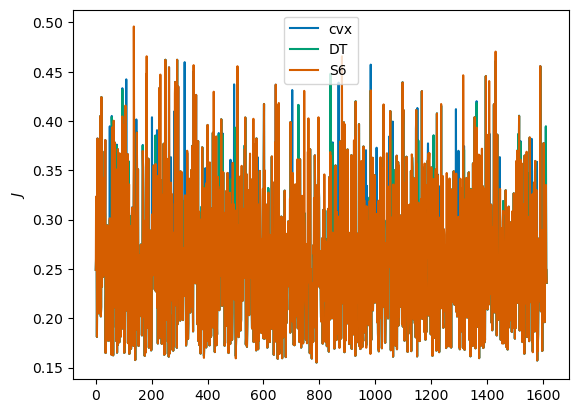

In [155]:
plt.figure()
plt.plot(J_min_scp_cvx_feas, label = 'cvx')
plt.plot(J_min_scp_DT_feas, label = 'DT')
plt.plot(J_min_scp_S6_feas, label = 'S6')
plt.ylabel(r'$J$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Testset analysis as function of CTGS0.
CTGS0 >  0  . Test dataset size:  1490
J_scp_gain_mean_ctgs_0:  -1.9746687342307336 J_scp_gain_std_ctgs_0:  10.910267298960873
J_scp_gain2_mean_ctgs_0:  -1.9746687342307336
J_scp_percloss_cvx_mean_ctgs_0:  31.102670958872135 J_scp_percloss_cvx_std_ctgs_0:  21.956956622650576
J_scp_percloss_S6_mean_ctgs_0:  33.0109681082188 J_scp_percloss_S6_std_ctgs_0:  22.006819365479657
J_scp_percloss_DT_mean_ctgs_0:  29.406226674370576 J_scp_percloss_DT_std_ctgs_0:  19.820505052892162
iter_gain_mean_0:  -2.0523489932885908  iter_gain_std_0:  2.668976223113643
iter_scp_mean_cvx_0:  4.292617449664429  iter_scp_std_cvx_0:  2.3730051731173742
iter_scp_mean_S6_0:  6.34496644295302  iter_scp_std_S6_0:  3.196756666809876
iter_scp_mean_DT_0:  2.653020134228188  iter_scp_std_DT_0:  1.4226384905387588
DTruntime_gain_mean_0:  3.0123744871792377  DTruntime_gain_std_0:  2.6234753106190087
S6runtime_gain_mean_0:  -4.705191683769226  S6runtime_gain_std_0:  3.61780187899219
ru

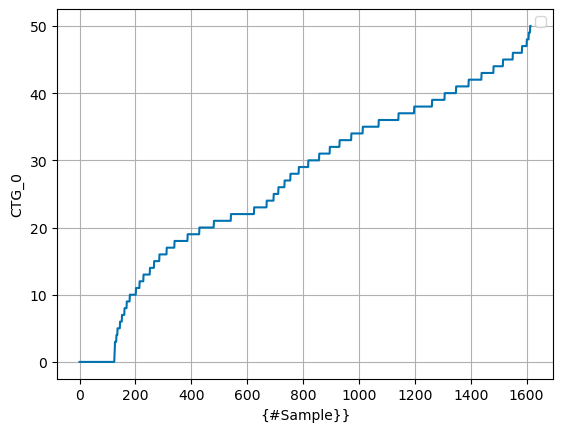

In [156]:
ctgs_range = range(0, 41, 1)
test_dataset_size = np.zeros(shape=(len(ctgs_range),), dtype=int)
J_scp_percgain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain2_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S6_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_scp_percloss_DT_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
iter_scp_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_gain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_gain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 

runtime_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_gain_mean_ctgsS6 = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsS6 = np.zeros(shape=(len(ctgs_range),), dtype=float)
runtime_gain_mean_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 

J_relgain_scp_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_percgain_scp_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_percgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT

n_unfeas_scp_cvx = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_S6 = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_DT = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT

ctgxx = 1

print('Testset analysis as function of CTGS0.')

fig, ax1 = plt.subplots()
ax1.plot(sorted(ctgs0_cvx_feas))
plt.legend(loc='best')
ax1.set_xlabel('{#Sample}}')
ax1.set_ylabel('CTG_0', color='k')
plt.grid(True)

iter = 0
for ctg in ctgs_range:

    ctg_mask = ctgs0_cvx_feas > ctg  # shape (n_feasible,), bool array

    ctgs0_cvx_feas_ctg = ctgs0_cvx_feas[ctg_mask]
    J_vect_scp_cvx_feas_ctg = J_vect_scp_cvx_feas[ctg_mask]
    J_vect_scp_S6_feas_ctg = J_vect_scp_S6_feas[ctg_mask]
    J_vect_scp_DT_feas_ctg = J_vect_scp_DT_feas[ctg_mask]

    J_cvx_feas_ctg = J_cvx_feas[ctg_mask]
    J_S6_feas_ctg = J_S6_feas[ctg_mask]
    J_DT_feas_ctg = J_DT_feas[ctg_mask]

    iter_scp_cvx_feas_ctg = iter_scp_cvx_feas[ctg_mask]
    iter_scp_S6_feas_ctg = iter_scp_S6_feas[ctg_mask]
    iter_scp_DT_feas_ctg = iter_scp_DT_feas[ctg_mask]

    runtime_cvx_feas_ctg = runtime_cvx_feas[ctg_mask]
    runtime_scp_cvx_feas_ctg = runtime_scp_cvx_feas[ctg_mask]

    runtime_S6_feas_ctg = runtime_S6_feas[ctg_mask]
    runtime_scp_S6_feas_ctg = runtime_scp_S6_feas[ctg_mask]

    runtime_DT_feas_ctg = runtime_DT_feas[ctg_mask]
    runtime_scp_DT_feas_ctg = runtime_scp_DT_feas[ctg_mask]

    if ctg == ctgxx:
        J_vect_scp_cvx_feas_ctgxx = J_vect_scp_cvx_feas_ctg
        J_vect_scp_S6_feas_ctgxx = J_vect_scp_S6_feas_ctg
        J_vect_scp_DT_feas_ctgxx = J_vect_scp_DT_feas_ctg    # Added line for DT
        J_cvx_feas_ctgxx = J_cvx_feas_ctg
        J_S6_feas_ctgxx = J_S6_feas_ctg
        J_DT_feas_ctgxx = J_DT_feas_ctg  # Added line for DT
        iter_scp_cvx_feas_ctgxx = iter_scp_cvx_feas_ctg
        iter_scp_S6_feas_ctgxx = iter_scp_S6_feas_ctg
        iter_scp_DT_feas_ctgxx = iter_scp_DT_feas_ctg  # Added line for DT

    test_dataset_size[iter] = len(ctgs0_cvx_feas_ctg)
    print('CTGS0 > ', ctg, ' . Test dataset size: ', test_dataset_size[iter])
    J_min_scp_cvx_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_cvx_feas_ctg])
    J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
    J_min_scp_S6_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_S6_feas_ctg]) 
    J_avg_scp_S6_feas_ctg = J_min_scp_S6_feas_ctg.mean()*1000.
    J_min_scp_DT_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_DT_feas_ctg]) 
    J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
    J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.

    J_scp_percgain_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    J_scp_percgain_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    print('J_scp_gain_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter], 'J_scp_gain_std_ctgs_' + str(ctg) + ': ', J_scp_percgain_std_ctgs[iter])

    J_scp_percgain2_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg))/np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg))*100
    print('J_scp_gain2_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter])

    J_scp_percloss_cvx_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_cvx_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S6_mean_ctgs[iter] = np.mean((J_min_scp_S6_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S6_std_ctgs[iter] = np.std((J_min_scp_S6_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_DT_mean_ctgs[iter] = np.mean((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    J_scp_percloss_DT_std_ctgs[iter] = np.std((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    print('J_scp_percloss_cvx_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_mean_ctgs[iter], 'J_scp_percloss_cvx_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_std_ctgs[iter])
    print('J_scp_percloss_S6_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_S6_mean_ctgs[iter], 'J_scp_percloss_S6_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_S6_std_ctgs[iter])
    print('J_scp_percloss_DT_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_mean_ctgs[iter], 'J_scp_percloss_DT_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_std_ctgs[iter])

    iter_scp_mean_cvx_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg)
    iter_scp_mean_S6_ctgs[iter] = np.mean(iter_scp_S6_feas_ctg)
    iter_scp_mean_DT_ctgs[iter] = np.mean(iter_scp_DT_feas_ctg)  # Added line for DT
    iter_scp_std_cvx_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg)
    iter_scp_std_S6_ctgs[iter] = np.std(iter_scp_S6_feas_ctg)
    iter_scp_std_DT_ctgs[iter] = np.std(iter_scp_DT_feas_ctg)    # Added line for DT
    iter_scp_gain_mean_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg - iter_scp_S6_feas_ctg)
    iter_scp_gain_std_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg - iter_scp_S6_feas_ctg)
    print('iter_gain_mean_' + str(ctg) + ': ', iter_scp_gain_mean_ctgs[iter], ' iter_gain_std_' + str(ctg) + ': ', iter_scp_gain_std_ctgs[iter])
    print('iter_scp_mean_cvx_' + str(ctg) + ': ', iter_scp_mean_cvx_ctgs[iter], ' iter_scp_std_cvx_' + str(ctg) + ': ', iter_scp_std_cvx_ctgs[iter])
    print('iter_scp_mean_S6_' + str(ctg) + ': ', iter_scp_mean_S6_ctgs[iter], ' iter_scp_std_S6_' + str(ctg) + ': ', iter_scp_std_S6_ctgs[iter])
    print('iter_scp_mean_DT_' + str(ctg) + ': ', iter_scp_mean_DT_ctgs[iter], ' iter_scp_std_DT_' + str(ctg) + ': ', iter_scp_std_DT_ctgs[iter])

    runtime_mean_cvx_ctgs[iter] = np.mean(runtime_cvx_feas_ctg)
    runtime_mean_S6_ctgs[iter] = np.mean(runtime_S6_feas_ctg)
    runtime_mean_DT_ctgs[iter] = np.mean(runtime_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_ctgs[iter] = np.std(runtime_cvx_feas_ctg)
    runtime_std_S6_ctgs[iter] = np.std(runtime_S6_feas_ctg)
    runtime_std_DT_ctgs[iter] = np.std(runtime_DT_feas_ctg)    # Added line for DT
    runtime_mean_cvx_scp_ctgs[iter] = np.mean(runtime_scp_cvx_feas_ctg)
    runtime_mean_S6_scp_ctgs[iter] = np.mean(runtime_scp_S6_feas_ctg)
    runtime_mean_DT_scp_ctgs[iter] = np.mean(runtime_scp_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_scp_ctgs[iter] = np.std(runtime_scp_cvx_feas_ctg)
    runtime_std_S6_scp_ctgs[iter] = np.std(runtime_scp_S6_feas_ctg)
    runtime_std_DT_scp_ctgs[iter] = np.std(runtime_scp_DT_feas_ctg)    # Added line for DT

    runtime_mean_cvx_tot_ctgs[iter] = np.mean(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_mean_S6_tot_ctgs[iter] = np.mean(runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg)
    runtime_mean_DT_tot_ctgs[iter] = np.mean(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_std_cvx_tot_ctgs[iter] = np.std(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_std_S6_tot_ctgs[iter] = np.std(runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg)
    runtime_std_DT_tot_ctgs[iter] = np.std(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_gain_mean_ctgsS6[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg))
    runtime_gain_std_ctgsS6[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg))
    runtime_gain_mean_ctgsDT[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))
    runtime_gain_std_ctgsDT[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))

    # print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    # print('S6runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS6[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS6[iter])

    print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], ' DTruntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    print('S6runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS6[iter], ' S6runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS6[iter])
    print('runtime_scp_mean_cvx_' + str(ctg) + ': ', runtime_mean_cvx_tot_ctgs[iter], ' runtime_scp_std_cvx_' + str(ctg) + ': ', runtime_std_cvx_tot_ctgs[iter])
    print('runtime_scp_mean_DT_' + str(ctg) + ': ', runtime_mean_DT_tot_ctgs[iter], ' runtime_scp_std_DT_' + str(ctg) + ': ', runtime_std_DT_tot_ctgs[iter])
    print('runtime_scp_mean_S6_' + str(ctg) + ': ', runtime_mean_S6_tot_ctgs[iter], ' runtime_scp_std_S6_' + str(ctg) + ': ', runtime_std_S6_tot_ctgs[iter])


    J_relgain_scp_cvx_mean_ctgs[iter] = J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg
    
    J_relgain_scp_DT_mean_ctgs[iter] = J_avg_scp_DT_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_DT_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_DT_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)

    J_relgain_scp_S6_mean_ctgs[iter] = J_avg_scp_S6_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_S6_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_S6_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)
    
    
    # total = np.sum(ctg_mask)
    # if total > 0:
    #     n_unfeas_scp_cvx[iter] = 100 * np.sum(~feasibility_list_CVX[ctg_mask]) / total
    #     n_unfeas_scp_DT[iter] = 100 * np.sum(~feasibility_list_DT[ctg_mask]) / total
    #     n_unfeas_scp_S6[iter] = 100 * np.sum(~feasibility_list_S6[ctg_mask]) / total
    # else:
    #     # Avoid division by zero if no samples >= ctg
    #     n_unfeas_scp_cvx[iter] = np.nan
    #     n_unfeas_scp_DT[iter] = np.nan
    #     n_unfeas_scp_S6[iter] = np.nan

    # # i_ctg2 = list(set(np.rint(test_dataset_ix[ctgs0_cvx>=ctg]).astype(int)))

    # # i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx).intersection(set(i_ctg2)))
    # # i_unfeas_scp_DT_ctg = list(set(i_unfeas_DT).intersection(set(i_ctg2)))
    # # i_unfeas_scp_S6_ctg = list(set(i_unfeas_S6).intersection(set(i_ctg2)))
    
    # # n_unfeas_scp_cvx[iter] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_DT[iter] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_S6[iter] = (len(i_unfeas_scp_S6_ctg)/len(i_ctg2))*100

    iter += 1

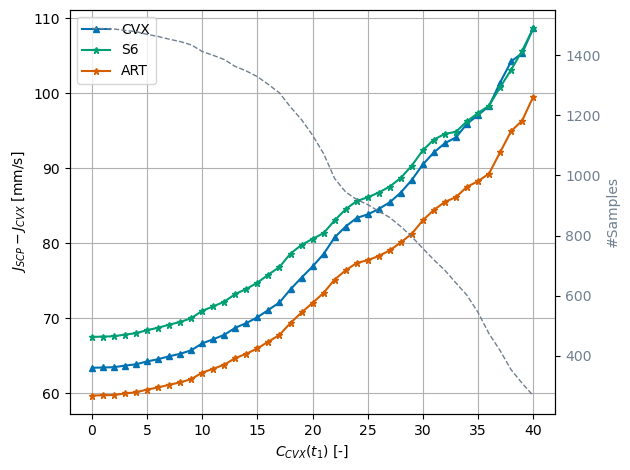

In [157]:
#%matplotlib ipympl
plt.style.use('seaborn-v0_8-colorblind')

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'$J_{SCP} - J_{CVX}$ [mm/s]', color='k')
ax1.plot(ctgs_range, J_relgain_scp_cvx_mean_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, J_relgain_scp_S6_mean_ctgs, marker='*', markersize=5,  label='S6')
    ax1.plot(ctgs_range, J_relgain_scp_DT_mean_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, J_relgain_scp_S6_mean_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
# plt.hlines(0, 0, 51, linestyle='--', color='k')
# plt.ylim([-0.01, 0.01])
plt.legend(loc='best')
plt.grid(True)
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_il.png', dpi=600)


In [158]:
print(100*J_percgain_scp_S6_mean_ctgs)
print(100*J_percgain_scp_DT_mean_ctgs)

[-6.49637045 -6.49637971 -6.49638636 -6.49654248 -6.49668295 -6.49731879
 -6.49850812 -6.49982547 -6.50228599 -6.50555863 -6.51512912 -6.52192861
 -6.53074409 -6.5502685  -6.56384564 -6.58430934 -6.62274452 -6.56343344
 -6.44535309 -5.78241411 -4.78956452 -3.54616847 -2.8193641  -2.79801667
 -2.714495   -2.72593375 -2.58956699 -2.45214164 -2.2511408  -2.16207988
 -2.10534769 -1.85269382 -1.33013941 -0.78938315 -0.34949675 -0.28602049
 -0.04825689  0.62716755  1.06641581 -0.28923247 -0.01626799]
[5.84165812 5.84166645 5.84166609 5.84179314 5.84191944 5.84242141
 5.84349086 5.84466703 5.84683408 5.84976535 5.85833462 5.86434723
 5.87229889 5.88918633 5.90138349 5.91963806 5.95347337 5.99963347
 6.07920212 6.16294587 6.31877105 6.59866659 6.95184497 7.10882064
 7.20045294 7.29368849 7.40950585 7.50975971 7.66128124 8.11787389
 8.2190866  8.32382368 8.3923621  8.46821831 8.76507395 9.07943235
 9.16285453 9.16964513 8.91714244 8.5507566  8.39393796]


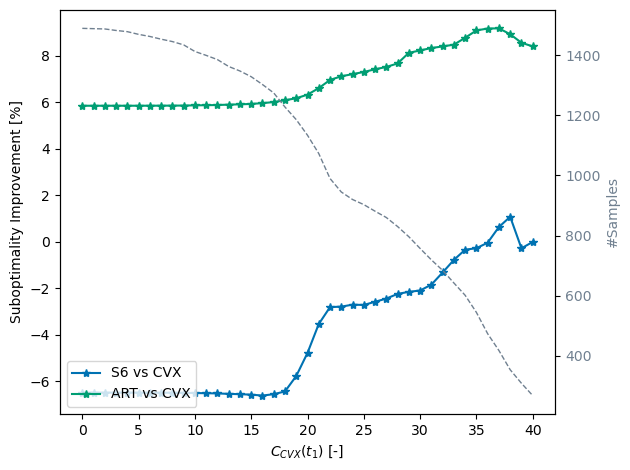

In [159]:

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Suboptimality Improvement [%]', color='k')
if rl:
    ax1.plot(ctgs_range, J_percgain_scp_S6_mean_ctgs*100., marker='*', label='S6 vs CVX')
    ax1.plot(ctgs_range, J_percgain_scp_DT_mean_ctgs*100., marker='*', label='ART vs CVX')
else:
    ax1.plot(ctgs_range, J_percgain_scp_S6_mean_ctgs*100., marker='*', label='ART-IL vs CVX')
ax1.tick_params(axis='y', labelcolor=color)
if rl:
    plt.legend(loc='lower left')
else:
    plt.legend(loc='lower left')
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_il.png', dpi=600)




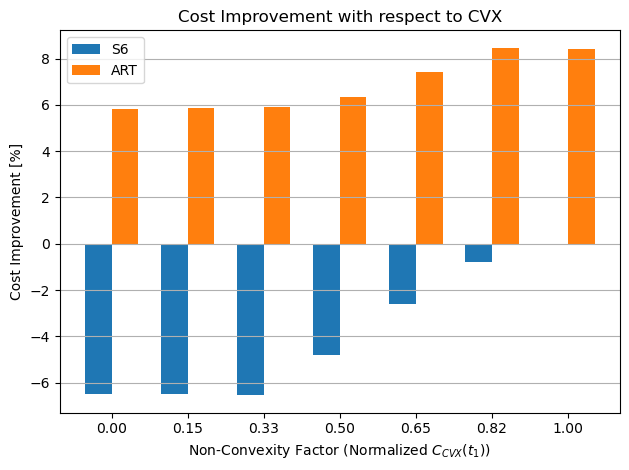

In [160]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean cost values at selected CTG points ===
J_S6_sample = J_percgain_scp_S6_mean_ctgs[ctg_sample_points]
J_DT_sample_S6 = J_percgain_scp_DT_mean_ctgs[ctg_sample_points]
# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s6 = 100 * J_S6_sample
gain_dt = 100 * J_DT_sample_S6

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s6, width=bar_width, label='S6', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Cost Improvement [%]')
ax.set_title('Cost Improvement with respect to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


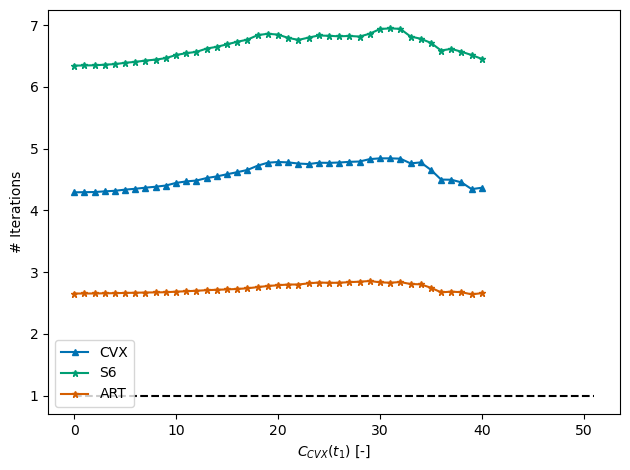

In [161]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'# Iterations', color='k')
ax1.plot(ctgs_range, iter_scp_mean_cvx_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, iter_scp_mean_S6_ctgs, marker='*', markersize=5,  label='S6')
    ax1.plot(ctgs_range, iter_scp_mean_DT_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, iter_scp_mean_S6_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(1, 0, 51, linestyle='--', color='k')
plt.legend(loc='lower left')
# ax2 = ax1.twinx() 
# color = 'slategray'
# ax2.set_ylabel('#Samples', color=color)
# ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_il.png', dpi=600)



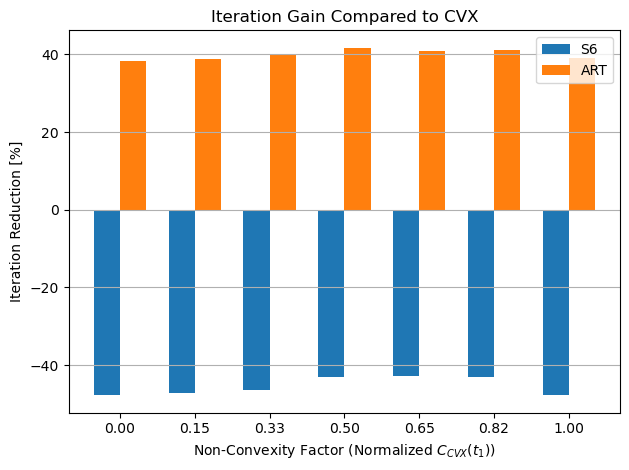

In [162]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean iteration values at selected CTG points ===
cvx_iter_sample = iter_scp_mean_cvx_ctgs[ctg_sample_points]
s6_iter_sample = iter_scp_mean_S6_ctgs[ctg_sample_points]
dt_iter_sample = iter_scp_mean_DT_ctgs[ctg_sample_points]

# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s6 = 100 * (cvx_iter_sample - s6_iter_sample) / cvx_iter_sample
gain_dt_S6 = 100 * (cvx_iter_sample - dt_iter_sample) / cvx_iter_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s6, width=bar_width, label='S6', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt_S6, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Iteration Reduction [%]')
ax.set_title('Iteration Gain Compared to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


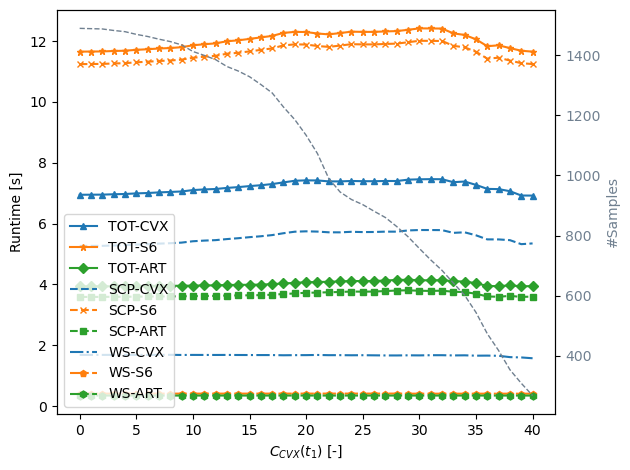

In [163]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Runtime [s]', color='k')

# Assign different markers and colors
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, marker='^', markersize=5, color='#1f77b4', label='TOT-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_tot_ctgs, marker='D', markersize=5, color='#2ca02c', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, linestyle='--', color='#1f77b4', label='SCP-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_scp_ctgs, linestyle='--',color='#ff7f0e', marker='x', markersize=5, label='SCP-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_scp_ctgs, linestyle='--', color='#2ca02c', marker='s', markersize=5, label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='x', markersize=5, label='SCP-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_ctgs, linestyle='-.', color='#1f77b4', label='WS-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_ctgs, linestyle='-.', color='#ff7f0e', marker='p', markersize=5, label='WS-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_ctgs, linestyle='-.', color='#2ca02c', marker='h', markersize=5, label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_ctgs, linestyle='-.', color='orangered', marker='p', markersize=5, label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor='k')
plt.legend(loc='lower left')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_il.png', dpi=600)


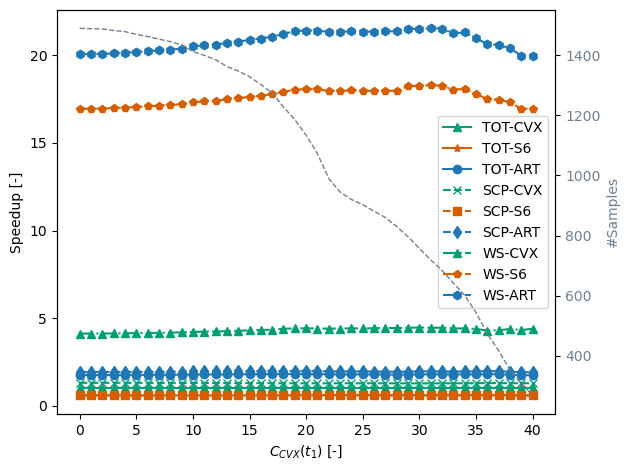

In [164]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Speedup [-]', color='k')

# CVX Type - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_tot_ctgs, linestyle='-', marker='^', color='#009E73', label='TOT-CVX')

# S6 Type - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_tot_ctgs, linestyle='-', marker='o', color='#1f77b4', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-ART-IL')

# SCP-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_scp_ctgs, linestyle='--', color='#009E73', marker='x', label='SCP-CVX')

# SCP-S6 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='s', label='SCP-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_scp_ctgs, linestyle='--', color='#1f77b4', marker='d', label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='*', label='SCP-ART-IL')

# WS-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_ctgs, linestyle='-.', color='#009E73', marker='^', label='WS-CVX')

# WS-S6 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_ctgs, linestyle='-.', color='#D55E00', marker='p', label='WS-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_ctgs, linestyle='-.', color='#1f77b4', marker='h', label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_ctgs, linestyle='-.', color='orangered', marker='s', label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_il.png', dpi=600)


FORECASTING ANALYSIS BETWEEN ART AND S4D

In [165]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP


traj_data_S4 = np.load(root_folder + '/optimization/saved_files/prediction_analysisS4FULL/pred_analysis_2_checkpoint_ff_ctgrtg_art_vs_checkpoint_ff_S4_rcgsa_test2000.npz',allow_pickle=True)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/tran

In [166]:
# ==== Feasibility flags ====
feasibility_list_CVX = traj_data_S4['feasibility_list_CVX']
feasibility_list_DT = traj_data_S4['feasibility_list_DT']
feasibility_list_S4 = traj_data_S4['feasibility_list_S4']

# ==== Costs ====
ctgs0_cvx = traj_data_S4['ctgs0_cvx']
J_list_CVX = traj_data_S4['J_list_CVX']
J_list_DT = traj_data_S4['J_list_DT']
J_list_S4 = traj_data_S4['J_list_S4']

# ==== J vectors ====
J_vect_scp_list_CVX = traj_data_S4['J_vect_scp_list_CVX']
J_vect_scp_list_DT = traj_data_S4['J_vect_scp_list_DT']
J_vect_scp_list_S4 = traj_data_S4['J_vect_scp_list_S4']

# ==== Warmstart runtime metrics ====
runtime_list_CVX = traj_data_S4['runtime_list_CVX']
runtime_list_DT = traj_data_S4['runtime_list_DT']
runtime_list_S4 = traj_data_S4['runtime_list_S4']

# ==== SCP runtime metrics ====
runtime_scp_list_CVX = traj_data_S4['runtime_scp_list_CVX']
runtime_scp_list_DT = traj_data_S4['runtime_scp_list_DT']
runtime_scp_list_S4 = traj_data_S4['runtime_scp_list_S4']

# ==== SCP Iterations ====
iter_scp_list_CVX = traj_data_S4['iter_scp_list_CVX']
iter_scp_list_DT = traj_data_S4['iter_scp_list_DT']
iter_scp_list_S4 = traj_data_S4['iter_scp_list_S4']

# ==== Errors ====
trajectory_rmse_list_DT = traj_data_S4['trajectory_rmse_list_DT']
trajectory_rmse_list_S4 = traj_data_S4['trajectory_rmse_list_S4']
control_error_list_DT = traj_data_S4['control_error_list_DT']
control_error_list_S4 = traj_data_S4['control_error_list_S4']
final_state_error_list_DT = traj_data_S4['final_state_error_list_DT']
final_state_error_list_S4 = traj_data_S4['final_state_error_list_S4']

In [167]:
num_true = np.sum(feasibility_list_DT)  # Counts True values (True is 1, False is 0)
num_false = len(feasibility_list_DT) - num_true  # Remaining are False
num_true_S4 = np.sum(feasibility_list_S4)  # Counts True values (True is 1, False is 0)
num_false_S4 = len(feasibility_list_S4) - num_true_S4   # Remaining are False
print(f"#Feasible ART: {num_true}, #Not-Feasible ART: {num_false}")
print(f"#Feasible S4: {num_true_S4}, #Not-Feasible S4: {num_false_S4}")

#Feasible ART: 2000, #Not-Feasible ART: 32217
#Feasible S4: 1569, #Not-Feasible S4: 32648


In [168]:
combined_feasibility_mask = feasibility_list_DT & feasibility_list_S4 & feasibility_list_CVX
print(f"Feasible in all models: {np.sum(combined_feasibility_mask)}")

Feasible in all models: 1568


In [169]:
# === Masking for DT ===
filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[combined_feasibility_mask]
filtered_control_error_DT = control_error_list_DT[combined_feasibility_mask]
filtered_final_state_error_DT = final_state_error_list_DT[combined_feasibility_mask]
filtered_runtime_DT = runtime_list_DT[combined_feasibility_mask]
filtered_runtime_scp_DT = runtime_scp_list_DT[combined_feasibility_mask]
filtered_iter_scp_DT = iter_scp_list_DT[combined_feasibility_mask]
filtered_J_list_DT = J_list_DT[combined_feasibility_mask]
filtered_J_vect_scp_list_DT = J_vect_scp_list_DT[combined_feasibility_mask]

# === Masking for S4 ===
filtered_trajectory_rmse_S4 = trajectory_rmse_list_S4[combined_feasibility_mask]
filtered_control_error_S4 = control_error_list_S4[combined_feasibility_mask]
filtered_final_state_error_S4 = final_state_error_list_S4[combined_feasibility_mask]
filtered_runtime_S4 = runtime_list_S4[combined_feasibility_mask]
filtered_runtime_scp_S4 = runtime_scp_list_S4[combined_feasibility_mask]
filtered_iter_scp_S4 = iter_scp_list_S4[combined_feasibility_mask]
filtered_J_list_S4 = J_list_S4[combined_feasibility_mask]
filtered_J_vect_scp_list_S4 = J_vect_scp_list_S4[combined_feasibility_mask]

# === Masking for CVX ===
filtered_runtime_CVX = runtime_list_CVX[combined_feasibility_mask]
filtered_runtime_scp_CVX = runtime_scp_list_CVX[combined_feasibility_mask]
filtered_iter_scp_CVX = iter_scp_list_CVX[combined_feasibility_mask]
filtered_ctgs0_cvx = ctgs0_cvx[combined_feasibility_mask]
filtered_J_list_CVX = J_list_CVX[combined_feasibility_mask]
filtered_J_vect_scp_list_CVX = J_vect_scp_list_CVX[combined_feasibility_mask]



print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
print(f" # Feasible Trajectories for S4: {len(filtered_trajectory_rmse_S4)}")
print(f" # Feasible Trajectories for CVX: {len(filtered_runtime_scp_CVX)}")

 # Feasible Trajectories for ART: 1568
 # Feasible Trajectories for S4: 1568
 # Feasible Trajectories for CVX: 1568


In [170]:
# ART forecasting analysis

# === DT Metrics ===
mean_trajectory_rmse_DT = np.mean(filtered_trajectory_rmse_DT)
std_trajectory_rmse_DT = np.std(filtered_trajectory_rmse_DT)

mean_control_error_DT = np.mean(filtered_control_error_DT)
std_control_error_DT = np.std(filtered_control_error_DT)

mean_final_state_error_DT = np.mean(filtered_final_state_error_DT)
std_final_state_error_DT = np.std(filtered_final_state_error_DT)

mean_runtime_DT = np.mean(filtered_runtime_DT)
std_runtime_DT = np.std(filtered_runtime_DT)

mean_runtime_scp_DT = np.mean(filtered_runtime_scp_DT)
std_runtime_scp_DT = np.std(filtered_runtime_scp_DT)

mean_iter_scp_DT = np.mean(filtered_iter_scp_DT)
std_iter_scp_DT = np.std(filtered_iter_scp_DT)

min_J_vect_scp_DT = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
mean_convergence_cost_DT = np.mean(min_J_vect_scp_DT)
std_convergence_cost_DT = np.std(min_J_vect_scp_DT)

# === S4 Metrics ===
mean_trajectory_rmse_S4 = np.mean(filtered_trajectory_rmse_S4)
std_trajectory_rmse_S4 = np.std(filtered_trajectory_rmse_S4)

mean_control_error_S4 = np.mean(filtered_control_error_S4)
std_control_error_S4 = np.std(filtered_control_error_S4)

mean_final_state_error_S4 = np.mean(filtered_final_state_error_S4)
std_final_state_error_S4 = np.std(filtered_final_state_error_S4)

mean_runtime_S4 = np.mean(filtered_runtime_S4)
std_runtime_S4 = np.std(filtered_runtime_S4)

mean_runtime_scp_S4 = np.mean(filtered_runtime_scp_S4)
std_runtime_scp_S4 = np.std(filtered_runtime_scp_S4)

mean_iter_scp_S4 = np.mean(filtered_iter_scp_S4)
std_iter_scp_S4 = np.std(filtered_iter_scp_S4)

min_J_vect_scp_S4 = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S4])
mean_convergence_cost_S4 = np.mean(min_J_vect_scp_S4)
std_convergence_cost_S4 = np.std(min_J_vect_scp_S4)

# === CVX Metrics ===
mean_runtime_CVX = np.mean(filtered_runtime_CVX)
std_runtime_CVX = np.std(filtered_runtime_CVX)

mean_runtime_scp_CVX = np.mean(filtered_runtime_scp_CVX)
std_runtime_scp_CVX = np.std(filtered_runtime_scp_CVX)

mean_iter_scp_CVX = np.mean(filtered_iter_scp_CVX)
std_iter_scp_CVX = np.std(filtered_iter_scp_CVX)

min_J_vect_scp_CVX = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX])
mean_convergence_cost_CVX = np.mean(min_J_vect_scp_CVX)
std_convergence_cost_CVX = np.std(min_J_vect_scp_CVX)


# === Print Results ===
print("Decision Transformer (DT) Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_DT:.4f} ± {std_trajectory_rmse_DT:.4f}")
print(f"Control Error: {mean_control_error_DT:.4f} ± {std_control_error_DT:.4f}")
print(f"Final State Error: {mean_final_state_error_DT:.4f} ± {std_final_state_error_DT:.4f}")
print(f"Runtime: {mean_runtime_DT:.4f} ± {std_runtime_DT:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_DT:.4f} ± {std_runtime_scp_DT:.4f}")
print(f"Iterations SCP: {mean_iter_scp_DT:.2f} ± {std_iter_scp_DT:.2f}")
print(f"Converged Cost: {mean_convergence_cost_DT:.4f} ± {std_convergence_cost_DT:.4f}")

print("\nS4 Model Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_S4:.4f} ± {std_trajectory_rmse_S4:.4f}")
print(f"Control Error: {mean_control_error_S4:.4f} ± {std_control_error_S4:.4f}")
print(f"Final State Error: {mean_final_state_error_S4:.4f} ± {std_final_state_error_S4:.4f}")
print(f"Runtime: {mean_runtime_S4:.4f} ± {std_runtime_S4:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_S4:.4f} ± {std_runtime_scp_S4:.4f}")
print(f"Iterations SCP: {mean_iter_scp_S4:.2f} ± {std_iter_scp_S4:.2f}")
print(f"Converged Cost: {mean_convergence_cost_S4:.4f} ± {std_convergence_cost_S4:.4f}")

print("\nCVX Warm Start Mean ± Std:")
print(f"Runtime: {mean_runtime_CVX:.4f} ± {std_runtime_CVX:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_CVX:.4f} ± {std_runtime_scp_CVX:.4f}")
print(f"Iterations SCP: {mean_iter_scp_CVX:.2f} ± {std_iter_scp_CVX:.2f}")
print(f"Converged Cost: {mean_convergence_cost_CVX:.4f} ± {std_convergence_cost_CVX:.4f}")



Decision Transformer (DT) Mean ± Std:
Trajectory RMSE: 0.0420 ± 0.0615
Control Error: 0.0011 ± 0.0012
Final State Error: 0.0051 ± 0.0007
Runtime: 0.3358 ± 0.0300
Runtime SCP: 3.4505 ± 1.6530
Iterations SCP: 2.67 ± 1.39
Converged Cost: 0.2589 ± 0.0615

S4 Model Mean ± Std:
Trajectory RMSE: 0.0736 ± 0.1229
Control Error: 0.0015 ± 0.0014
Final State Error: 0.0051 ± 0.0007
Runtime: 0.3539 ± 0.0063
Runtime SCP: 12.0128 ± 4.6281
Iterations SCP: 7.76 ± 4.05
Converged Cost: 0.2712 ± 0.0732

CVX Warm Start Mean ± Std:
Runtime: 1.6057 ± 0.7390
Runtime SCP: 5.0596 ± 2.7160
Iterations SCP: 4.31 ± 2.63
Converged Cost: 0.2639 ± 0.0681


WARMSTARTING ANALYSIS BETWEEN ART AND S4D

In [171]:
print("Size of ctgs0_cvx:", len(ctgs0_cvx))

ctgs0_cvx_feas = filtered_ctgs0_cvx
J_vect_scp_cvx_feas = filtered_J_vect_scp_list_CVX
J_vect_scp_DT_feas = filtered_J_vect_scp_list_DT
J_vect_scp_S4_feas = filtered_J_vect_scp_list_S4

J_cvx_feas = filtered_J_list_CVX
J_DT_feas = filtered_J_list_DT
J_S4_feas = filtered_J_list_S4

iter_scp_cvx_feas = filtered_iter_scp_CVX
iter_scp_DT_feas = filtered_iter_scp_DT
iter_scp_S4_feas = filtered_iter_scp_S4

runtime_cvx_feas = filtered_runtime_CVX
runtime_scp_cvx_feas = filtered_runtime_scp_CVX

runtime_DT_feas = filtered_runtime_DT
runtime_S4_feas = filtered_runtime_S4

runtime_scp_DT_feas = filtered_runtime_scp_DT
runtime_scp_S4_feas = filtered_runtime_scp_S4

print('Full feasible nncvx testset analysis. Test dataset size: ', len(ctgs0_cvx_feas))

J_min_scp_cvx_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX]) # final converged cost at the end of optimization solution
J_min_scp_DT_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
J_min_scp_S4_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S4])

J_scp_gain_mean_DT = np.mean(J_min_scp_cvx_feas - J_min_scp_DT_feas)
J_scp_gain_std_DT = np.std(J_min_scp_cvx_feas - J_min_scp_DT_feas)
print('J_scp_gain_mean_DT:', J_scp_gain_mean_DT, 'J_scp_gain_std_DT:', J_scp_gain_std_DT)
J_scp_gain_mean = np.mean(J_min_scp_cvx_feas - J_min_scp_S4_feas)
J_scp_gain_std = np.std(J_min_scp_cvx_feas - J_min_scp_S4_feas)
print('J_scp_gain_mean_S4:', J_scp_gain_mean, 'J_scp_gain_std_S4:', J_scp_gain_std)

# Percentage Calculation
J_scp_gain_mean_perc_DT = np.mean((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement DT: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)]])
J_scp_gain_mean_perc_S4 = np.mean((J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement S4: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas)]])

# Indexes of best trajectories with respect to assumption that we achived lower loss for our model compared to cvx relaxation
ix_sort_DT = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement DT: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort_DT][:10])])
ix_sort = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement S4: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort][:10])])

J_scp_gain_std_perc_DT = np.std((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc DT: ', J_scp_gain_mean_perc_DT, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc_DT)
J_scp_gain_std_perc = np.std((J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc S4: ', J_scp_gain_mean_perc_S4, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc)

iter_scp_mean_cvx = np.mean(iter_scp_cvx_feas)
iter_scp_mean_DT = np.mean(iter_scp_DT_feas)
iter_scp_mean_S4 = np.mean(iter_scp_S4_feas)
iter_scp_gain_mean_DT = np.mean(iter_scp_cvx_feas - iter_scp_DT_feas)
iter_scp_gain_std_DT = np.std(iter_scp_cvx_feas - iter_scp_DT_feas)
print('iter_gain_mean DT: ', iter_scp_gain_mean_DT, ' iter_gain_std DT: ', iter_scp_gain_std_DT)
iter_scp_gain_meanS4 = np.mean(iter_scp_cvx_feas - iter_scp_S4_feas)
iter_scp_gain_stdS4 = np.std(iter_scp_cvx_feas - iter_scp_S4_feas)
print('iter_gain_mean S4: ', iter_scp_gain_meanS4, ' iter_gain_std S4: ', iter_scp_gain_stdS4)
print('iter_scp_mean_cvx: ', iter_scp_mean_cvx, ' iter_scp_mean_S4 : ', iter_scp_mean_S4,' iter_scp_mean_DT : ', iter_scp_mean_DT)

runtime_scp_mean_cvx = np.mean(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_mean_DT = np.mean(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_mean_S4 = np.mean(runtime_S4_feas + runtime_scp_S4_feas)
runtime_gain_meanDT = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_stdDT = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_meanS4 = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S4_feas + runtime_scp_S4_feas))
runtime_gain_stdS4 = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S4_feas + runtime_scp_S4_feas))
print('runtime_gain_mean DT: ', runtime_gain_meanDT, ' runtime_gain_std DT: ', runtime_gain_stdDT)
print('runtime_gain_mean S4: ', runtime_gain_meanS4, ' runtime_gain_std S4: ', runtime_gain_stdS4)
print('runtime_ws_mean_cvx: ', np.mean(runtime_cvx_feas), ' runtime_ws_mean_S4: ', np.mean(runtime_S4_feas), ' runtime_ws_mean_DT: ', np.mean(runtime_DT_feas))
print('runtime_scp_mean_cvx: ', runtime_scp_mean_cvx, ' runtime_scp_mean_S4: ', runtime_scp_mean_S4, ' runtime_scp_mean_DT: ', runtime_scp_mean_DT)

ind_sort_J_cvx_feas = np.argsort(J_cvx_feas)
J_cvx_feas_sort = J_cvx_feas[ind_sort_J_cvx_feas]
perc_opt_loss_DT = (J_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_S4 = (J_S4_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_cvx = (J_min_scp_cvx_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_DT  = (J_min_scp_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_S4  = (J_min_scp_S4_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100

ind_sort_ctgs0_cvx = np.argsort(ctgs0_cvx_feas)
ctgs0_cvx_sort = ctgs0_cvx_feas[ind_sort_ctgs0_cvx]
perc_opt_loss_DT_ctgs = (J_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_S4_ctgs = (J_S4_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_cvx_ctgs = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_DT_ctgs = (J_min_scp_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_scp_S4_ctgs = (J_min_scp_S4_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100


perc_cost_gain_ctgsDT = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_DT_feas[ind_sort_ctgs0_cvx])/J_min_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_cost_gain_ctgsS4 = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_S4_feas[ind_sort_ctgs0_cvx]) / J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100
iter_gain_ctgsDT = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_DT_feas[ind_sort_ctgs0_cvx])
iter_gain_ctgsS4 = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_S4_feas[ind_sort_ctgs0_cvx])
perc_runtime_gain_ctgsDT = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_DT_feas[ind_sort_ctgs0_cvx])/runtime_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_runtime_gain_ctgsS4 = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_S4_feas[ind_sort_ctgs0_cvx]) / runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100

Delta_J_mean_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # Original DT line
Delta_J_std_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S4 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S4 = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # DT version
count_scp_S4 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float) 
Delta_J_std_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S4_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S4_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_DT_2_cvx = np.mean((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_std_DT_2_cvx = np.std((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_mean_S4_2_cvx = np.mean((J_S4_feas - J_cvx_feas) / J_cvx_feas)
Delta_J_std_S4_2_cvx = np.std((J_S4_feas - J_cvx_feas) / J_cvx_feas)

for i in range(iter_max_SCP):
    # === CVX ===
    J_vals_cvx = []
    J_vals_cvx_2_cvx = []

    for j in range(len(J_vect_scp_cvx_feas)):
        if i < len(J_vect_scp_cvx_feas[j]):
            val = J_vect_scp_cvx_feas[j][i]
            if val > 1e10:
                val = J_min_scp_cvx_feas[j]
            J_vals_cvx.append(val)
            J_vals_cvx_2_cvx.append(val)
        else:
            # Pad with final value (or J_min) if shorter than iter_max_SCP
            J_vals_cvx.append(J_min_scp_cvx_feas[j])
            J_vals_cvx_2_cvx.append(J_min_scp_cvx_feas[j])

    J_vals_cvx = np.array(J_vals_cvx)
    Delta_J_mean_scp_cvx[i] = np.mean((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_std_scp_cvx[i] = np.std((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_mean_scp_cvx_2_cvx[i] = np.mean((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_cvx_2_cvx[i] = np.std((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_cvx[i] = len(J_vals_cvx)

    # === Repeat similar logic for DT ===
    J_vals_DT = []
    J_vals_DT_2_cvx = []

    for j in range(len(J_vect_scp_DT_feas)):
        if i < len(J_vect_scp_DT_feas[j]):
            val = J_vect_scp_DT_feas[j][i]
            if val > 1e10:
                val = J_min_scp_DT_feas[j]
            J_vals_DT.append(val)
            J_vals_DT_2_cvx.append(val)
        else:
            J_vals_DT.append(J_min_scp_DT_feas[j])
            J_vals_DT_2_cvx.append(J_min_scp_DT_feas[j])

    J_vals_DT = np.array(J_vals_DT)
    Delta_J_mean_scp_DT[i] = np.mean((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_std_scp_DT[i] = np.std((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_mean_scp_DT_2_cvx[i] = np.mean((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_DT_2_cvx[i] = np.std((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_DT[i] = len(J_vals_DT)

    # === Repeat for S4 ===
    J_vals_S4 = []
    J_vals_S4_2_cvx = []

    for j in range(len(J_vect_scp_S4_feas)):
        if i < len(J_vect_scp_S4_feas[j]):
            val = J_vect_scp_S4_feas[j][i]
            if val > 1e10:
                val = J_min_scp_S4_feas[j]
            J_vals_S4.append(val)
            J_vals_S4_2_cvx.append(val)
        else:
            J_vals_S4.append(J_min_scp_S4_feas[j])
            J_vals_S4_2_cvx.append(J_min_scp_S4_feas[j])

    J_vals_S4 = np.array(J_vals_S4)
    Delta_J_mean_scp_S4[i] = np.mean((J_vals_S4 - J_min_scp_S4_feas) / J_min_scp_S4_feas)
    Delta_J_std_scp_S4[i] = np.std((J_vals_S4 - J_min_scp_S4_feas) / J_min_scp_S4_feas)
    Delta_J_mean_scp_S4_2_cvx[i] = np.mean((J_vals_S4_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_S4_2_cvx[i] = np.std((J_vals_S4_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_S4[i] = len(J_vals_S4)


Size of ctgs0_cvx: 34217
Full feasible nncvx testset analysis. Test dataset size:  1568
J_scp_gain_mean_DT: 0.004948343245402297 J_scp_gain_std_DT: 0.023069796826362367
J_scp_gain_mean_S4: -0.0073251975377249725 J_scp_gain_std_S4: 0.04498111409700021
J_scp_gain_mean_perc DT:  1.2284020980568473  J_scp_gain_std_perc:  5.940257274703743
J_scp_gain_mean_perc S4:  -3.4418725057149424  J_scp_gain_std_perc:  16.233787833756583
iter_gain_mean DT:  1.6403061224489797  iter_gain_std DT:  2.2727215341073284
iter_gain_mean S4:  -3.443877551020408  iter_gain_std S4:  3.034565037134331
iter_scp_mean_cvx:  4.311862244897959  iter_scp_mean_S4 :  7.755739795918367  iter_scp_mean_DT :  2.6715561224489797
runtime_gain_mean DT:  2.8789850441472873  runtime_gain_std DT:  2.764490987625565
runtime_gain_mean S4:  -5.701323357619802  runtime_gain_std S4:  3.759737772568318
runtime_ws_mean_cvx:  1.6057463003968706  runtime_ws_mean_S4:  0.35385092697581466  runtime_ws_mean_DT:  0.3357814197637597
runtime_scp_m

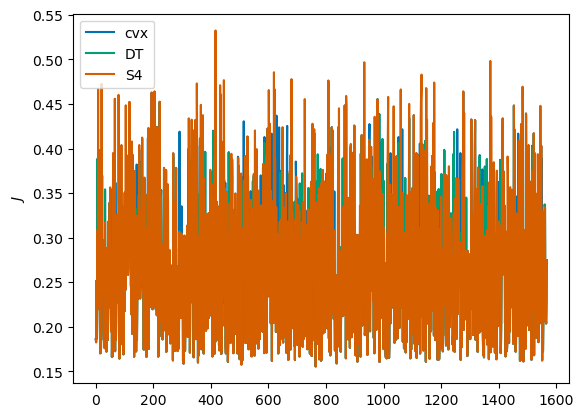

In [172]:
plt.figure()
plt.plot(J_min_scp_cvx_feas, label = 'cvx')
plt.plot(J_min_scp_DT_feas, label = 'DT')
plt.plot(J_min_scp_S4_feas, label = 'S4')
plt.ylabel(r'$J$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Testset analysis as function of CTGS0.
CTGS0 >  0  . Test dataset size:  1457
J_scp_gain_mean_ctgs_0:  -3.705536366305775 J_scp_gain_std_ctgs_0:  16.811620812783385
J_scp_gain2_mean_ctgs_0:  -3.705536366305775
J_scp_percloss_cvx_mean_ctgs_0:  35.0231117078411 J_scp_percloss_cvx_std_ctgs_0:  26.104728513190217
J_scp_percloss_S4_mean_ctgs_0:  38.82815943786847 J_scp_percloss_S4_std_ctgs_0:  28.722648092499835
J_scp_percloss_DT_mean_ctgs_0:  32.51402691741007 J_scp_percloss_DT_std_ctgs_0:  22.82140994058149
iter_gain_mean_0:  -3.5552505147563487  iter_gain_std_0:  3.1137001420904173
iter_scp_mean_cvx_0:  4.564172958133151  iter_scp_std_cvx_0:  2.5594174317317075
iter_scp_mean_S4_0:  8.1194234728895  iter_scp_std_S4_0:  3.9689270367102663
iter_scp_mean_DT_0:  2.7282086479066576  iter_scp_std_DT_0:  1.4196316052748648
DTruntime_gain_mean_0:  3.0452278118552454  DTruntime_gain_std_0:  2.76518308154796
S4runtime_gain_mean_0:  -5.884874334544782  S4runtime_gain_std_0:  3.8043480029117225
runti

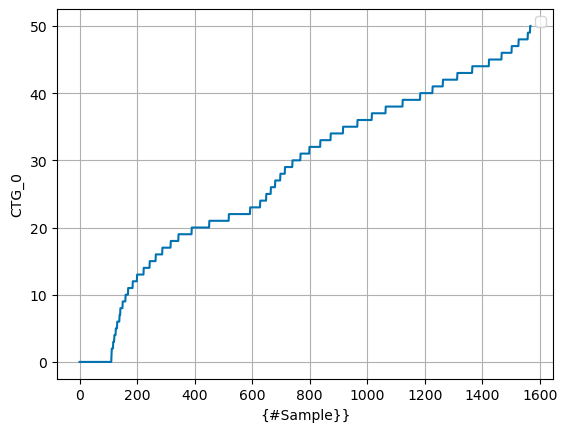

In [173]:
ctgs_range = range(0, 41, 1)
test_dataset_size = np.zeros(shape=(len(ctgs_range),), dtype=int)
J_scp_percgain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain2_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S4_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S4_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_scp_percloss_DT_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
iter_scp_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_gain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_gain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 

runtime_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_gain_mean_ctgsS4 = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsS4 = np.zeros(shape=(len(ctgs_range),), dtype=float)
runtime_gain_mean_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 

J_relgain_scp_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_S4_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_percgain_scp_S4_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_percgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT

n_unfeas_scp_cvx = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_S4 = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_DT = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT

ctgxx = 1

print('Testset analysis as function of CTGS0.')

fig, ax1 = plt.subplots()
ax1.plot(sorted(ctgs0_cvx_feas))
plt.legend(loc='best')
ax1.set_xlabel('{#Sample}}')
ax1.set_ylabel('CTG_0', color='k')
plt.grid(True)

iter = 0
for ctg in ctgs_range:

    ctg_mask = ctgs0_cvx_feas > ctg  # shape (n_feasible,), bool array

    ctgs0_cvx_feas_ctg = ctgs0_cvx_feas[ctg_mask]
    J_vect_scp_cvx_feas_ctg = J_vect_scp_cvx_feas[ctg_mask]
    J_vect_scp_S4_feas_ctg = J_vect_scp_S4_feas[ctg_mask]
    J_vect_scp_DT_feas_ctg = J_vect_scp_DT_feas[ctg_mask]

    J_cvx_feas_ctg = J_cvx_feas[ctg_mask]
    J_S4_feas_ctg = J_S4_feas[ctg_mask]
    J_DT_feas_ctg = J_DT_feas[ctg_mask]

    iter_scp_cvx_feas_ctg = iter_scp_cvx_feas[ctg_mask]
    iter_scp_S4_feas_ctg = iter_scp_S4_feas[ctg_mask]
    iter_scp_DT_feas_ctg = iter_scp_DT_feas[ctg_mask]

    runtime_cvx_feas_ctg = runtime_cvx_feas[ctg_mask]
    runtime_scp_cvx_feas_ctg = runtime_scp_cvx_feas[ctg_mask]

    runtime_S4_feas_ctg = runtime_S4_feas[ctg_mask]
    runtime_scp_S4_feas_ctg = runtime_scp_S4_feas[ctg_mask]

    runtime_DT_feas_ctg = runtime_DT_feas[ctg_mask]
    runtime_scp_DT_feas_ctg = runtime_scp_DT_feas[ctg_mask]

    if ctg == ctgxx:
        J_vect_scp_cvx_feas_ctgxx = J_vect_scp_cvx_feas_ctg
        J_vect_scp_S4_feas_ctgxx = J_vect_scp_S4_feas_ctg
        J_vect_scp_DT_feas_ctgxx = J_vect_scp_DT_feas_ctg    # Added line for DT
        J_cvx_feas_ctgxx = J_cvx_feas_ctg
        J_S4_feas_ctgxx = J_S4_feas_ctg
        J_DT_feas_ctgxx = J_DT_feas_ctg  # Added line for DT
        iter_scp_cvx_feas_ctgxx = iter_scp_cvx_feas_ctg
        iter_scp_S4_feas_ctgxx = iter_scp_S4_feas_ctg
        iter_scp_DT_feas_ctgxx = iter_scp_DT_feas_ctg  # Added line for DT

    test_dataset_size[iter] = len(ctgs0_cvx_feas_ctg)
    print('CTGS0 > ', ctg, ' . Test dataset size: ', test_dataset_size[iter])
    J_min_scp_cvx_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_cvx_feas_ctg])
    J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
    J_min_scp_S4_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_S4_feas_ctg]) 
    J_avg_scp_S4_feas_ctg = J_min_scp_S4_feas_ctg.mean()*1000.
    J_min_scp_DT_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_DT_feas_ctg]) 
    J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
    J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.

    J_scp_percgain_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S4_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    J_scp_percgain_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_min_scp_S4_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    print('J_scp_gain_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter], 'J_scp_gain_std_ctgs_' + str(ctg) + ': ', J_scp_percgain_std_ctgs[iter])

    J_scp_percgain2_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S4_feas_ctg))/np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg))*100
    print('J_scp_gain2_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter])

    J_scp_percloss_cvx_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_cvx_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S4_mean_ctgs[iter] = np.mean((J_min_scp_S4_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S4_std_ctgs[iter] = np.std((J_min_scp_S4_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_DT_mean_ctgs[iter] = np.mean((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    J_scp_percloss_DT_std_ctgs[iter] = np.std((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    print('J_scp_percloss_cvx_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_mean_ctgs[iter], 'J_scp_percloss_cvx_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_std_ctgs[iter])
    print('J_scp_percloss_S4_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_S4_mean_ctgs[iter], 'J_scp_percloss_S4_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_S4_std_ctgs[iter])
    print('J_scp_percloss_DT_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_mean_ctgs[iter], 'J_scp_percloss_DT_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_std_ctgs[iter])

    iter_scp_mean_cvx_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg)
    iter_scp_mean_S4_ctgs[iter] = np.mean(iter_scp_S4_feas_ctg)
    iter_scp_mean_DT_ctgs[iter] = np.mean(iter_scp_DT_feas_ctg)  # Added line for DT
    iter_scp_std_cvx_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg)
    iter_scp_std_S4_ctgs[iter] = np.std(iter_scp_S4_feas_ctg)
    iter_scp_std_DT_ctgs[iter] = np.std(iter_scp_DT_feas_ctg)    # Added line for DT
    iter_scp_gain_mean_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg - iter_scp_S4_feas_ctg)
    iter_scp_gain_std_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg - iter_scp_S4_feas_ctg)
    print('iter_gain_mean_' + str(ctg) + ': ', iter_scp_gain_mean_ctgs[iter], ' iter_gain_std_' + str(ctg) + ': ', iter_scp_gain_std_ctgs[iter])
    print('iter_scp_mean_cvx_' + str(ctg) + ': ', iter_scp_mean_cvx_ctgs[iter], ' iter_scp_std_cvx_' + str(ctg) + ': ', iter_scp_std_cvx_ctgs[iter])
    print('iter_scp_mean_S4_' + str(ctg) + ': ', iter_scp_mean_S4_ctgs[iter], ' iter_scp_std_S4_' + str(ctg) + ': ', iter_scp_std_S4_ctgs[iter])
    print('iter_scp_mean_DT_' + str(ctg) + ': ', iter_scp_mean_DT_ctgs[iter], ' iter_scp_std_DT_' + str(ctg) + ': ', iter_scp_std_DT_ctgs[iter])

    runtime_mean_cvx_ctgs[iter] = np.mean(runtime_cvx_feas_ctg)
    runtime_mean_S4_ctgs[iter] = np.mean(runtime_S4_feas_ctg)
    runtime_mean_DT_ctgs[iter] = np.mean(runtime_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_ctgs[iter] = np.std(runtime_cvx_feas_ctg)
    runtime_std_S4_ctgs[iter] = np.std(runtime_S4_feas_ctg)
    runtime_std_DT_ctgs[iter] = np.std(runtime_DT_feas_ctg)    # Added line for DT
    runtime_mean_cvx_scp_ctgs[iter] = np.mean(runtime_scp_cvx_feas_ctg)
    runtime_mean_S4_scp_ctgs[iter] = np.mean(runtime_scp_S4_feas_ctg)
    runtime_mean_DT_scp_ctgs[iter] = np.mean(runtime_scp_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_scp_ctgs[iter] = np.std(runtime_scp_cvx_feas_ctg)
    runtime_std_S4_scp_ctgs[iter] = np.std(runtime_scp_S4_feas_ctg)
    runtime_std_DT_scp_ctgs[iter] = np.std(runtime_scp_DT_feas_ctg)    # Added line for DT

    runtime_mean_cvx_tot_ctgs[iter] = np.mean(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_mean_S4_tot_ctgs[iter] = np.mean(runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg)
    runtime_mean_DT_tot_ctgs[iter] = np.mean(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_std_cvx_tot_ctgs[iter] = np.std(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_std_S4_tot_ctgs[iter] = np.std(runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg)
    runtime_std_DT_tot_ctgs[iter] = np.std(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_gain_mean_ctgsS4[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg))
    runtime_gain_std_ctgsS4[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg))
    runtime_gain_mean_ctgsDT[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))
    runtime_gain_std_ctgsDT[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))

    # print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    # print('S4runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS4[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS4[iter])

    print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], ' DTruntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    print('S4runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS4[iter], ' S4runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS4[iter])
    print('runtime_scp_mean_cvx_' + str(ctg) + ': ', runtime_mean_cvx_tot_ctgs[iter], ' runtime_scp_std_cvx_' + str(ctg) + ': ', runtime_std_cvx_tot_ctgs[iter])
    print('runtime_scp_mean_DT_' + str(ctg) + ': ', runtime_mean_DT_tot_ctgs[iter], ' runtime_scp_std_DT_' + str(ctg) + ': ', runtime_std_DT_tot_ctgs[iter])
    print('runtime_scp_mean_S4_' + str(ctg) + ': ', runtime_mean_S4_tot_ctgs[iter], ' runtime_scp_std_S4_' + str(ctg) + ': ', runtime_std_S4_tot_ctgs[iter])


    J_relgain_scp_cvx_mean_ctgs[iter] = J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg
    
    J_relgain_scp_DT_mean_ctgs[iter] = J_avg_scp_DT_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_DT_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_DT_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)

    J_relgain_scp_S4_mean_ctgs[iter] = J_avg_scp_S4_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_S4_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_S4_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)
    
    
    # total = np.sum(ctg_mask)
    # if total > 0:
    #     n_unfeas_scp_cvx[iter] = 100 * np.sum(~feasibility_list_CVX[ctg_mask]) / total
    #     n_unfeas_scp_DT[iter] = 100 * np.sum(~feasibility_list_DT[ctg_mask]) / total
    #     n_unfeas_scp_S4[iter] = 100 * np.sum(~feasibility_list_S4[ctg_mask]) / total
    # else:
    #     # Avoid division by zero if no samples >= ctg
    #     n_unfeas_scp_cvx[iter] = np.nan
    #     n_unfeas_scp_DT[iter] = np.nan
    #     n_unfeas_scp_S4[iter] = np.nan

    # # i_ctg2 = list(set(np.rint(test_dataset_ix[ctgs0_cvx>=ctg]).astype(int)))

    # # i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx).intersection(set(i_ctg2)))
    # # i_unfeas_scp_DT_ctg = list(set(i_unfeas_DT).intersection(set(i_ctg2)))
    # # i_unfeas_scp_S4_ctg = list(set(i_unfeas_S4).intersection(set(i_ctg2)))
    
    # # n_unfeas_scp_cvx[iter] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_DT[iter] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_S4[iter] = (len(i_unfeas_scp_S4_ctg)/len(i_ctg2))*100

    iter += 1

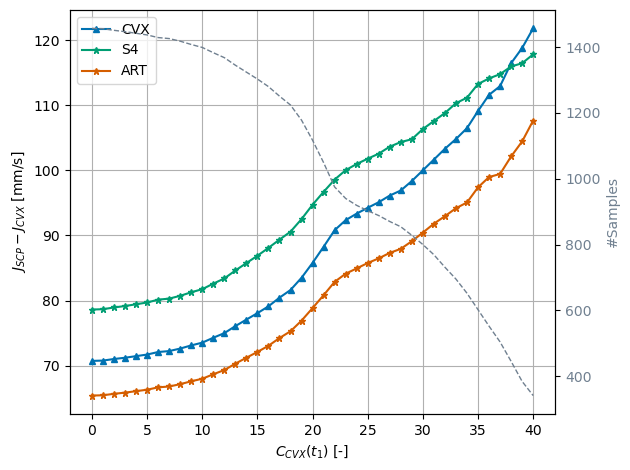

In [174]:
#%matplotlib ipympl
plt.style.use('seaborn-v0_8-colorblind')

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'$J_{SCP} - J_{CVX}$ [mm/s]', color='k')
ax1.plot(ctgs_range, J_relgain_scp_cvx_mean_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, J_relgain_scp_S4_mean_ctgs, marker='*', markersize=5,  label='S4')
    ax1.plot(ctgs_range, J_relgain_scp_DT_mean_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, J_relgain_scp_S4_mean_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
# plt.hlines(0, 0, 51, linestyle='--', color='k')
# plt.ylim([-0.01, 0.01])
plt.legend(loc='best')
plt.grid(True)
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_il.png', dpi=600)


In [175]:
print(100*J_percgain_scp_S4_mean_ctgs)
print(100*J_percgain_scp_DT_mean_ctgs)

[-11.1487896  -11.14879499 -11.14893121 -11.14914148 -11.14959013
 -11.15037796 -11.15220834 -11.15314468 -11.15656487 -11.16128736
 -11.16856047 -11.18310079 -11.19914535 -11.22908914 -11.25865037
 -11.2957091  -11.34599169 -11.08154662 -10.97108404 -10.79065949
 -10.41469183  -9.56013292  -8.55728039  -8.31195181  -8.16659386
  -7.99891325  -7.83944532  -7.81189558  -7.67789147  -6.52180225
  -6.33740065  -5.82781465  -5.31807178  -5.24952336  -4.39879001
  -3.80156581  -2.25689727  -1.63135737   0.43077864   1.97048601
   3.27906121]
[ 7.52766992  7.52767356  7.52776553  7.52790751  7.52821044  7.52874238
  7.52995383  7.53058604  7.53288897  7.53595948  7.54078605  7.55037798
  7.56139054  7.58171739  7.60175006  7.62709751  7.66085055  7.70867254
  7.76440098  7.8853397   8.08958609  8.42307092  8.73877739  8.90968147
  9.01437228  8.9984475   9.06710108  9.15601847  9.25078927  9.39789115
  9.56440806  9.6853678  10.0215358  10.13851029 10.71813734 10.74642679
 11.31224287 11.945

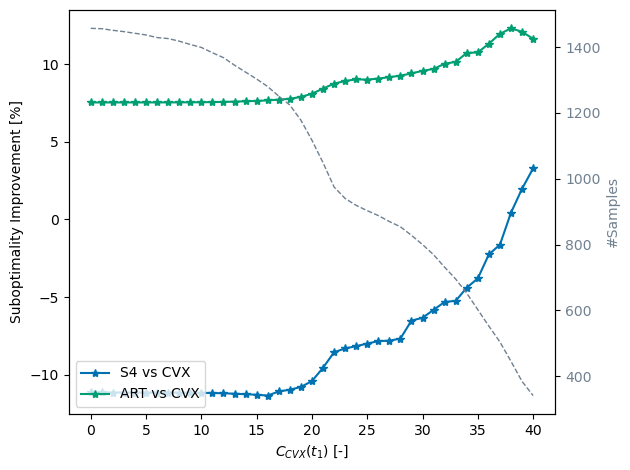

In [176]:

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Suboptimality Improvement [%]', color='k')
if rl:
    ax1.plot(ctgs_range, J_percgain_scp_S4_mean_ctgs*100., marker='*', label='S4 vs CVX')
    ax1.plot(ctgs_range, J_percgain_scp_DT_mean_ctgs*100., marker='*', label='ART vs CVX')
else:
    ax1.plot(ctgs_range, J_percgain_scp_S4_mean_ctgs*100., marker='*', label='ART-IL vs CVX')
ax1.tick_params(axis='y', labelcolor=color)
if rl:
    plt.legend(loc='lower left')
else:
    plt.legend(loc='lower left')
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_il.png', dpi=600)




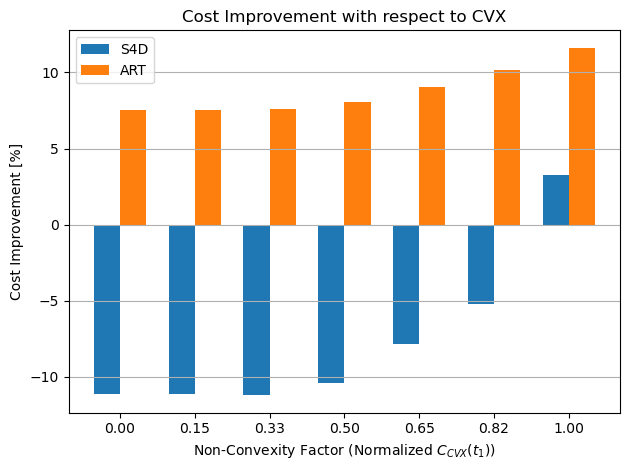

In [177]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean cost values at selected CTG points ===
J_S4_sample = J_percgain_scp_S4_mean_ctgs[ctg_sample_points]
J_DT_sample = J_percgain_scp_DT_mean_ctgs[ctg_sample_points]
# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s4 = 100 * J_S4_sample
gain_dt = 100 * J_DT_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s4, width=bar_width, label='S4D', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Cost Improvement [%]')
ax.set_title('Cost Improvement with respect to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


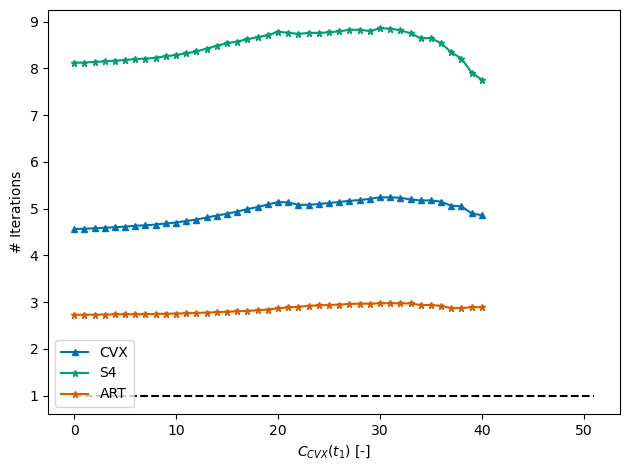

In [178]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'# Iterations', color='k')
ax1.plot(ctgs_range, iter_scp_mean_cvx_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, iter_scp_mean_S4_ctgs, marker='*', markersize=5,  label='S4')
    ax1.plot(ctgs_range, iter_scp_mean_DT_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, iter_scp_mean_S4_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(1, 0, 51, linestyle='--', color='k')
plt.legend(loc='lower left')
# ax2 = ax1.twinx() 
# color = 'slategray'
# ax2.set_ylabel('#Samples', color=color)
# ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_il.png', dpi=600)



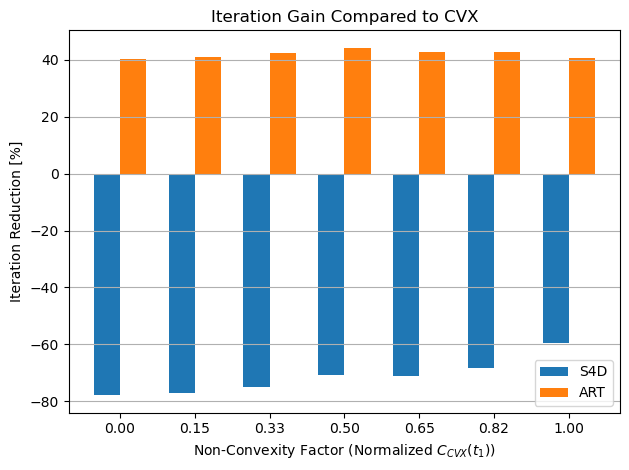

In [179]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean iteration values at selected CTG points ===
cvx_iter_sample = iter_scp_mean_cvx_ctgs[ctg_sample_points]
s4_iter_sample = iter_scp_mean_S4_ctgs[ctg_sample_points]
dt_iter_sample = iter_scp_mean_DT_ctgs[ctg_sample_points]

# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s4 = 100 * (cvx_iter_sample - s4_iter_sample) / cvx_iter_sample
gain_dt = 100 * (cvx_iter_sample - dt_iter_sample) / cvx_iter_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s4, width=bar_width, label='S4D', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Iteration Reduction [%]')
ax.set_title('Iteration Gain Compared to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


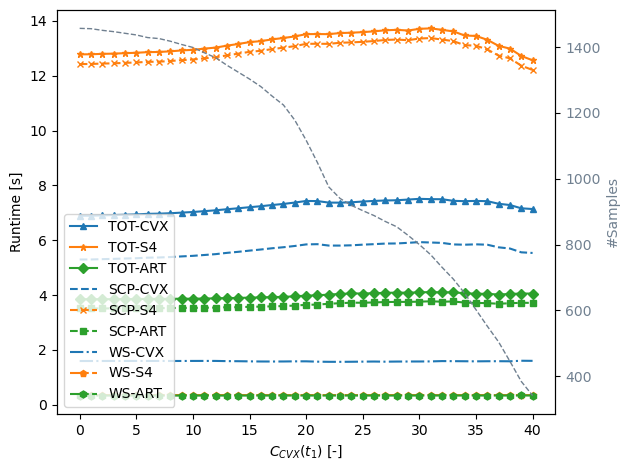

In [180]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Runtime [s]', color='k')

# Assign different markers and colors
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, marker='^', markersize=5, color='#1f77b4', label='TOT-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-S4')
    ax1.plot(ctgs_range, runtime_mean_DT_tot_ctgs, marker='D', markersize=5, color='#2ca02c', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, linestyle='--', color='#1f77b4', label='SCP-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4_scp_ctgs, linestyle='--',color='#ff7f0e', marker='x', markersize=5, label='SCP-S4')
    ax1.plot(ctgs_range, runtime_mean_DT_scp_ctgs, linestyle='--', color='#2ca02c', marker='s', markersize=5, label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4_scp_ctgs, linestyle='--', color='#D55E00', marker='x', markersize=5, label='SCP-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_ctgs, linestyle='-.', color='#1f77b4', label='WS-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4_ctgs, linestyle='-.', color='#ff7f0e', marker='p', markersize=5, label='WS-S4')
    ax1.plot(ctgs_range, runtime_mean_DT_ctgs, linestyle='-.', color='#2ca02c', marker='h', markersize=5, label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4_ctgs, linestyle='-.', color='orangered', marker='p', markersize=5, label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor='k')
plt.legend(loc='lower left')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_il.png', dpi=600)


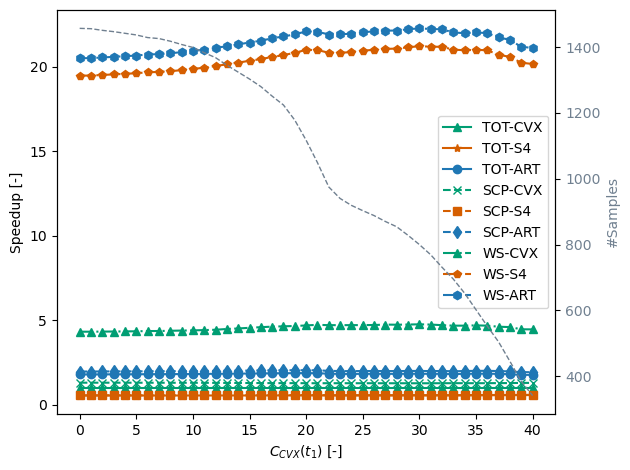

In [181]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Speedup [-]', color='k')

# CVX Type - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_tot_ctgs, linestyle='-', marker='^', color='#009E73', label='TOT-CVX')

# S4 Type - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-S4')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_tot_ctgs, linestyle='-', marker='o', color='#1f77b4', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-ART-IL')

# SCP-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_scp_ctgs, linestyle='--', color='#009E73', marker='x', label='SCP-CVX')

# SCP-S4 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_scp_ctgs, linestyle='--', color='#D55E00', marker='s', label='SCP-S4')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_scp_ctgs, linestyle='--', color='#1f77b4', marker='d', label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_scp_ctgs, linestyle='--', color='#D55E00', marker='*', label='SCP-ART-IL')

# WS-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_ctgs, linestyle='-.', color='#009E73', marker='^', label='WS-CVX')

# WS-S4 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_ctgs, linestyle='-.', color='#D55E00', marker='p', label='WS-S4')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_ctgs, linestyle='-.', color='#1f77b4', marker='h', label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_ctgs, linestyle='-.', color='orangered', marker='s', label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_il.png', dpi=600)


ALL COMBINED(Using S6's env ART FOR REFERENCE)

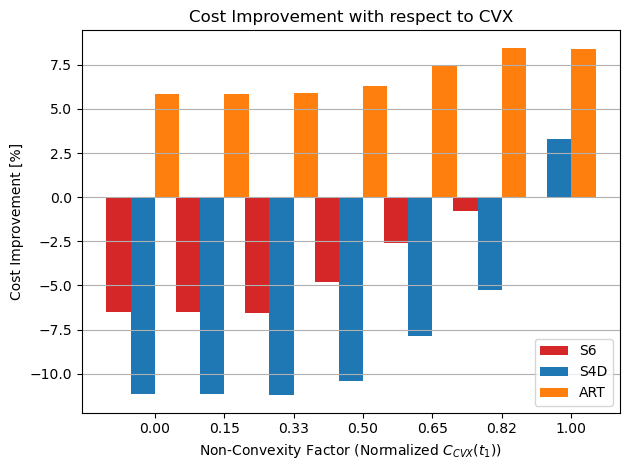

In [193]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean cost values at selected CTG points ===
J_S6_sample = J_percgain_scp_S6_mean_ctgs[ctg_sample_points]
J_S4_sample = J_percgain_scp_S4_mean_ctgs[ctg_sample_points]
# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s6 = 100 * J_S6_sample
gain_s4 = 100 * J_S4_sample
gain_dt = 100 * J_DT_sample_S6

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()

bar3 = ax.bar(x - 3*bar_width/2, gain_s6, width=bar_width, label='S6', color='tab:red')
bar1 = ax.bar(x - bar_width/2, gain_s4, width=bar_width, label='S4D', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Cost Improvement [%]')
ax.set_title('Cost Improvement with respect to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


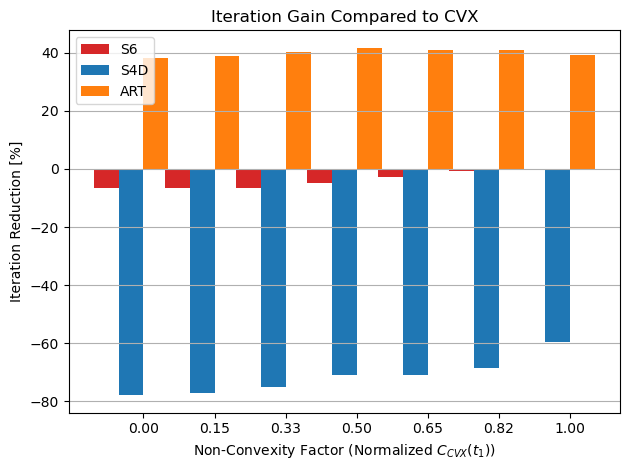

In [192]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean iteration values at selected CTG points ===
cvx_iter_sample = iter_scp_mean_cvx_ctgs[ctg_sample_points]
s4_iter_sample = iter_scp_mean_S4_ctgs[ctg_sample_points]
dt_iter_sample = iter_scp_mean_DT_ctgs[ctg_sample_points]

# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s4 = 100 * (cvx_iter_sample - s4_iter_sample) / cvx_iter_sample
# gain_dt = 100 * (cvx_iter_sample - dt_iter_sample) / cvx_iter_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar3 = ax.bar(x - 3*bar_width/2, gain_s6, width=bar_width, label='S6', color='tab:red')
bar1 = ax.bar(x - bar_width/2, gain_s4, width=bar_width, label='S4D', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt_S6, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Iteration Reduction [%]')
ax.set_title('Iteration Gain Compared to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend(loc = 'upper left')
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()
